In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

## All data Files and their paths

In [3]:
import os

folder_path = '/Users/ashutosh/Documents/Semesters/Sem7/BTP/DATA/'

# Get a list of all files in the folder
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]


sheets1 = pd.ExcelFile(folder_path+file_names[0]) ##  0.001 mM ATP
path1 = folder_path+file_names[0]
sheets2 = pd.ExcelFile(folder_path+file_names[5]) ##  0.025 mM ATP
path2 = folder_path+file_names[5]
sheets3 = pd.ExcelFile(folder_path+file_names[6]) ##  0.050 mM ATP
path3 = folder_path+file_names[6]
sheets4 = pd.ExcelFile(folder_path+file_names[1]) ##  0.100 mM ATP
path4 = folder_path+file_names[1]
sheets5 = pd.ExcelFile(folder_path+file_names[7]) ##  0.250 mM ATP
path5 = folder_path+file_names[7]
sheets6 = pd.ExcelFile(folder_path+file_names[4]) ##  0.500 mM ATP
path6 = folder_path+file_names[4]
sheets7 = pd.ExcelFile(folder_path+file_names[3]) ##  2 mM ATP
path7 = folder_path+file_names[3]

all_sheets = [(sheets1, path1), (sheets2, path2), (sheets3, path3), (sheets4, path4), (sheets5, path5), (sheets6, path6), (sheets7, path7)]

## In the sheets there are some sheets with repeated particle ids so i put particle ids 1-40 myself

In [4]:
file_names

['0.001 mM ATP file.xlsx',
 '0.1 mM ATP compiled file.xlsx',
 '.DS_Store',
 '2 mM ATP compiled file.xlsx',
 '0.5 mM ATP compiled file.xlsx',
 '0.025 mM ATP compiled file.xlsx',
 '0.05mM ATP compiled file.xlsx',
 '0.25 mM ATP compiled file.xlsx']

In [5]:
all_conc = ['0.001', '0.025', '0.050', '0.100', '0.250', '0.500', '2.000']

In [6]:
def get_change_in_angle(x1, y1, x2, y2, x3, y3):
    a1 = np.degrees(calculate_direction_angle(x1, y1, x2, y2))
    a2 = np.degrees(calculate_direction_angle(x2, y2, x3, y3))
    return abs(a1-a2)


## Function to generate combined Dataframe of a sheet(all particles ~40) in a file of Excel file

In [7]:
import pandas as pd
import numpy as np

def calculate_direction_angle(x1, y1, x2, y2):
    # Calculate the direction angle between two points (x1, y1) and (x2, y2)
    delta_x = x2 - x1
    delta_y = y2 - y1
    return np.arctan2(delta_y, delta_x)
def getAngle(x1, y1, x2, y2, x3, y3):
    a = np.array([x1, y1])
    b = np.array([x2, y2])
    c = np.array([x3, y3])
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return 180-(ang + 360 if ang < 0 else ang)

def get_df(sheetname, path_to_file):
    dataframes = {}
    particles = []
    part_id = 1
    for sheet_name in sheetname.sheet_names:
        dataframes[sheet_name] = pd.read_excel(path_to_file, sheet_name=sheet_name, header=None, usecols=[0, 1])

        dataframes[sheet_name].rename(columns={0: 'x', 1: 'y'}, inplace=True)
        
        dataframes[sheet_name]['ParticleID'] = part_id
        part_id += 1
        
        dataframes[sheet_name]['displacement(nm)'] = 0
        dataframes[sheet_name]['angle(deg)'] = 0  # the angle column
        
        ## Getting the displacement and angle at every t
        for i in range(1, len(dataframes[sheet_name])):
            x1, y1 = dataframes[sheet_name]['x'].loc[i-1], dataframes[sheet_name]['y'].loc[i-1]
            x2, y2 = dataframes[sheet_name]['x'].loc[i], dataframes[sheet_name]['y'].loc[i]
            
            # Calculated and stored the displacement (after every 10 ms)
            dataframes[sheet_name]['displacement(nm)'].loc[i] = 6 * (((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5)  # Displacement
            
            # Calculated and stored the angle of turn in radians(after every 10 ms)
            
            if i<len(dataframes[sheet_name])-1: 
                x3, y3 = dataframes[sheet_name]['x'].loc[i+1], dataframes[sheet_name]['y'].loc[i+1]
                dataframes[sheet_name]['angle(deg)'].loc[i] = abs(getAngle(x1, y1, x2, y2, x3, y3))
            
        particles.append(dataframes[sheet_name]['ParticleID'][0])
        ## every reading is taken at an interval of 10 ms
        dataframes[sheet_name]['time(ms)'] = [t*10 for t in range(0, len(dataframes[sheet_name]))]
        
    list_of_dfs = list(dataframes.values())
    dataframe = pd.concat(list_of_dfs, ignore_index=True)
    dataframe.dropna(inplace=True)
    print('Total Particles:', len(dataframes))
    return dataframe


In [8]:
dataframe1 = get_df(sheets1, path1)
dataframe2 = get_df(sheets2, path2)
dataframe3 = get_df(sheets3, path3)
dataframe4 = get_df(sheets4, path4)
dataframe5 = get_df(sheets5, path5)
dataframe6 = get_df(sheets6, path6)
dataframe7 = get_df(sheets7, path7)


/Users/ashutosh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Total Particles: 33
Total Particles: 40
Total Particles: 41
Total Particles: 40
Total Particles: 41
Total Particles: 38
Total Particles: 34


## Checking the outliers

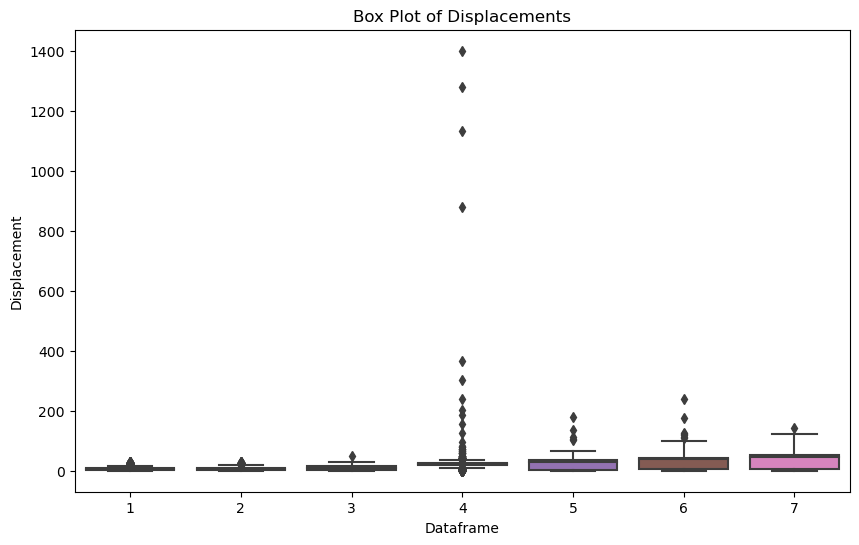

In [9]:
allconcdata = [dataframe1, dataframe2, dataframe3, dataframe4, dataframe5, dataframe6, dataframe7]


# Assuming you have dataframes df1, df2, ..., df7
# and the displacement data is in a column named 'displacement'

# Add a 'source' column to each dataframe to label them
for i in range(1, 8):
    allconcdata[i-1]['source'] = str(i)

# Combine all dataframes into one
combined_df = pd.concat([df for df in allconcdata])

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='source', y='displacement(nm)', data=combined_df)
plt.title('Box Plot of Displacements')
plt.xlabel('Dataframe')
plt.ylabel('Displacement')
plt.show()


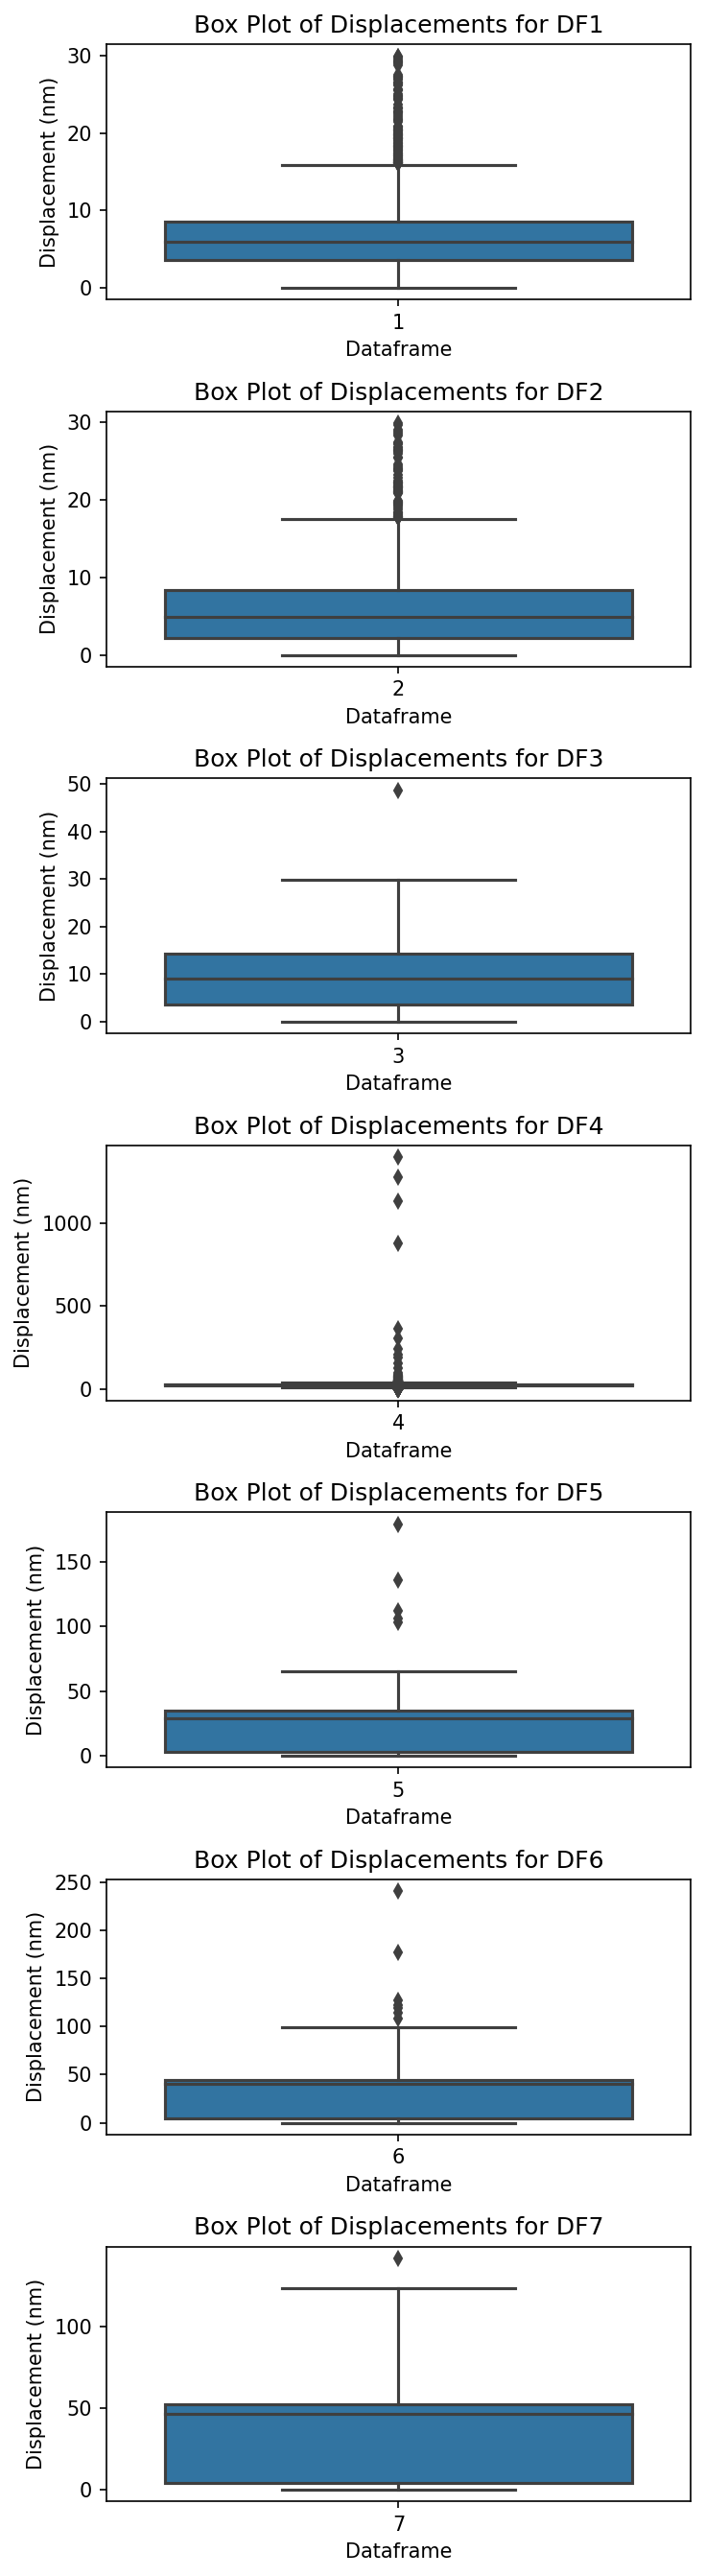

In [12]:
for i in range(1, 8):
    allconcdata[i-1]['source'] = f'{i}'

# Combine all dataframes into one
combined_df = pd.concat(allconcdata)

# Creating subplots
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(5, 18), dpi=150)  # Adjust the size as needed

for i in range(1, 8):
    source_df = combined_df[combined_df['source'] == f'{i}']
    sns.boxplot(x='source', y='displacement(nm)', data=source_df, ax=axes[i-1])
    axes[i-1].set_title(f'Box Plot of Displacements for DF{i}')
    axes[i-1].set_xlabel('Dataframe')
    axes[i-1].set_ylabel('Displacement (nm)')

plt.tight_layout()
plt.show()


In [13]:
# Identifying and Counting Outliers, and calculating percentages
outlier_info = {}

for i in range(1, 8):
    source_df = combined_df[combined_df['source'] == f'{i}']
    Q1 = source_df['displacement(nm)'].quantile(0.25)
    Q3 = source_df['displacement(nm)'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = source_df[(source_df['displacement(nm)'] < lower_bound) | 
                         (source_df['displacement(nm)'] > upper_bound)]
    total_count = len(source_df)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / total_count) * 100 if total_count > 0 else 0

    outlier_info[f'{i}'] = (outlier_count, outlier_percentage)

# Print the number and percentage of outliers for each source
print("Outliers in each dataframe:")
for source, (count, percentage) in outlier_info.items():
    print(f"{source}: {count} outliers, {percentage:.2f}% of data")

Outliers in each dataframe:
1: 100 outliers, 6.86% of data
2: 64 outliers, 4.62% of data
3: 1 outliers, 0.07% of data
4: 200 outliers, 14.63% of data
5: 5 outliers, 0.40% of data
6: 7 outliers, 0.65% of data
7: 1 outliers, 0.11% of data


## Removing the outliers

In [11]:
for i in range(7):
    # Calculate Q1, Q3, and IQR
    Q1 = allconcdata[i]['displacement(nm)'].quantile(0.25)
    Q3 = allconcdata[i]['displacement(nm)'].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = allconcdata[i]
    # Filter out outliers
    allconcdata[i] = df[(df['displacement(nm)'] >= lower_bound) & (df['displacement(nm)'] <= upper_bound)]


## Visualising the outliers again

/var/folders/fl/ftz0f2rj0bbg270g60kbg5wc0000gn/T/ipykernel_27090/2903140941.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allconcdata[i-1]['source'] = str(i)


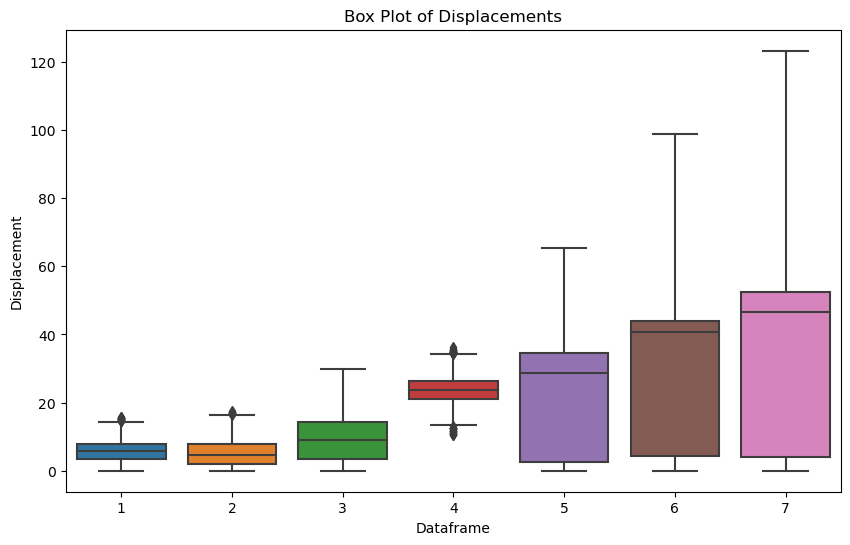

In [12]:


# Assuming you have dataframes df1, df2, ..., df7
# and the displacement data is in a column named 'displacement'

# Add a 'source' column to each dataframe to label them
for i in range(1, 8):
    allconcdata[i-1]['source'] = str(i)

# Combine all dataframes into one
combined_df = pd.concat([df for df in allconcdata])

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='source', y='displacement(nm)', data=combined_df)
plt.title('Box Plot of Displacements')
plt.xlabel('Dataframe')
plt.ylabel('Displacement')
plt.show()


# Assigning the dataframes to new dfs after removing the outliers

In [13]:
# dataframe1 = allconcdata[0]
# dataframe2 = allconcdata[1]
# dataframe3 = allconcdata[2]
# dataframe4 = allconcdata[3]
# dataframe5 = allconcdata[4]
# dataframe6 = allconcdata[5]
# dataframe7 = allconcdata[6]

In [14]:
## contains the dataframe of linear paths with stepsize = 2, 3, 4(namely: 2stepD, 3stepD, 4stepD)
linear_df = {}

## will contain the displacements for min step of linear paths (2/3/4) in corresponding ATP conc
linear_segments_minStep2 = {'0.001':[], '0.025':[], '0.050':[], '0.100':[], '0.250':[], '0.500':[]}
linear_segments_minStep3 = {'0.001':[], '0.025':[], '0.050':[], '0.100':[], '0.250':[], '0.500':[]}
linear_segments_minStep4 = {'0.001':[], '0.025':[], '0.050':[], '0.100':[], '0.250':[], '0.500':[]}

### Particle Id- I have created particle id 1 to x (x is number of sheets for every concentration)
### x, y are x and y coordinates of the particle respectively
### Displacement - It the displacement after every 1 step (i.e. after every 10ms)
### Angle(radians) - Calculated angle change after every step taking previous as reference
### Time- I have created it for reference time
### L2 - It is representing whether point xi is considered in linear path.  L2 is set to 1 if xi-1, xi, xi+1 lie in a linear path (threshold of 15 degrees) else 0
### L3 - here we see if xi lies in linear path considering point xi-2, xi-1, xi, xi+1. So if these points are in linear path then L3 is set to 1 corresponding to xi

In [15]:
## give df for which the excel is needed

dataframe = dataframe1
new_order = ['ParticleID', 'x', 'y', 'displacement(nm)', 'angle(deg)', 'time(ms)']
dataframe = dataframe.reindex(columns=new_order)


dataframe['L2'] = 0
dataframe['L3'] = 0


import math
import numpy as np

def getAngle(x1, y1, x2, y2, x3, y3): # returns angle between two lines
    a = np.array([x1, y1])
    b = np.array([x2, y2])
    c = np.array([x3, y3])
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang
    
for i in range(1, len(dataframe)-1):
        x1, y1, p1 = dataframe.iloc[i-1]['x'], dataframe.iloc[i-1]['y'], dataframe.iloc[i-1]['ParticleID']
        x2, y2, p2 = dataframe.iloc[i]['x'], dataframe.iloc[i]['y'], dataframe.iloc[i]['ParticleID']
        x3, y3, p3 = dataframe.iloc[i+1]['x'], dataframe.iloc[i+1]['y'], dataframe.iloc[i+1]['ParticleID']
        if p1==p2==p3 and abs(180-getAngle(x1, y1, x2, y2, x3, y3)) < 15:
#             print(getAngle(x1, y1, x2, y2, x3, y3))
            dataframe.loc[i, 'L2'] = 1

            
for i in range(2, len(dataframe)-1):
        x1, y1, p1 = dataframe.iloc[i-2]['x'], dataframe.iloc[i-2]['y'], dataframe.iloc[i-2]['ParticleID']
        x2, y2, p2 = dataframe.iloc[i-1]['x'], dataframe.iloc[i-1]['y'], dataframe.iloc[i-1]['ParticleID']
        x3, y3, p3 = dataframe.iloc[i]['x'], dataframe.iloc[i]['y'], dataframe.iloc[i]['ParticleID']
        x4, y4, p4 = dataframe.iloc[i+1]['x'], dataframe.iloc[i+1]['y'], dataframe.iloc[i+1]['ParticleID']
        if p1==p2==p3==p4 and abs(180-getAngle(x1, y1, x2, y2, x3, y3)) < 15 and \
                              abs(180-getAngle(x2, y2, x3, y3, x4, y4)) < 15:
#             print(getAngle(x1, y1, x2, y2, x3, y3), getAngle(x2, y2, x3, y3, x4, y4))
            dataframe.loc[i, 'L3'] = 1

print('Total L2:', sum(dataframe['L2']==1))
print('Total L3:', sum(dataframe['L3']==1))

## give filename to save with this name
# dataframe.to_excel('data-2 mM ATP.xlsx', index=False)

Total L2: 596
Total L3: 345


## The Trajectory of Particles 

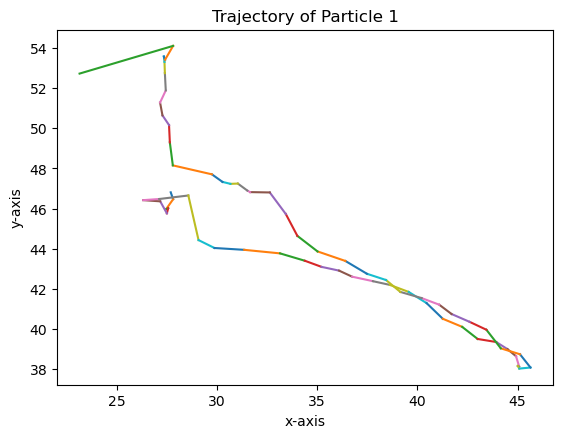

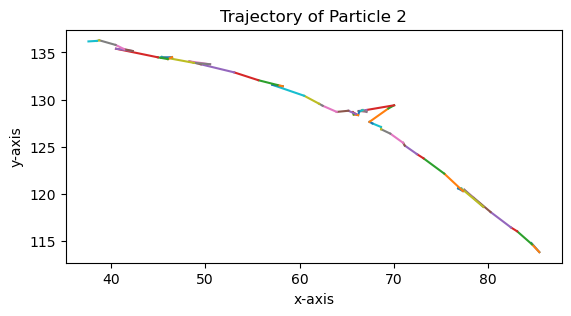

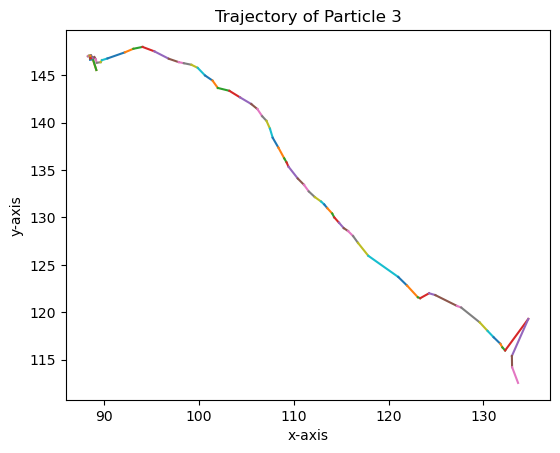

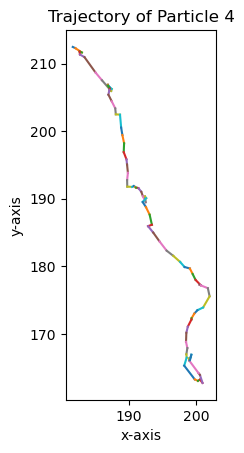

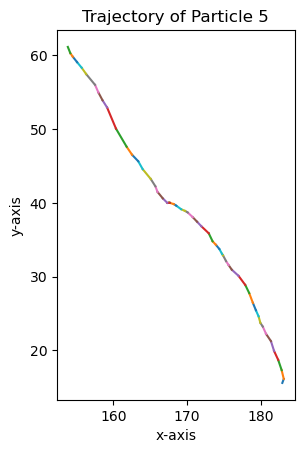

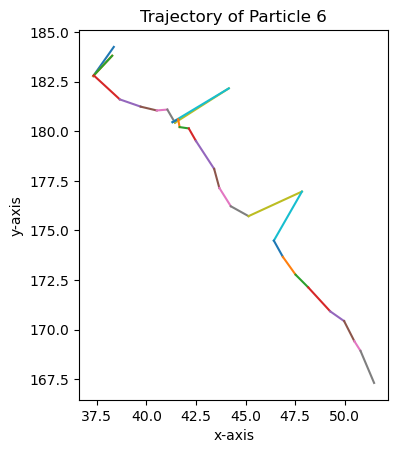

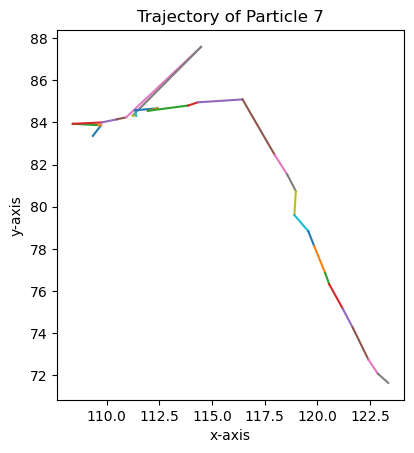

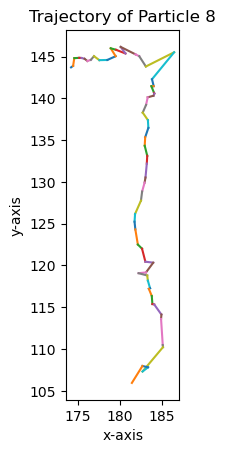

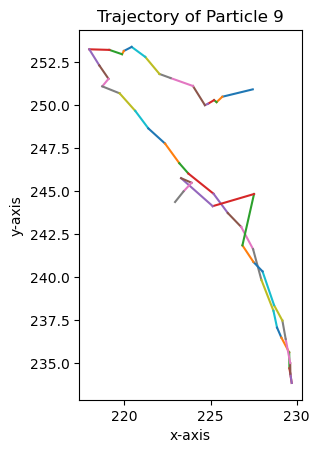

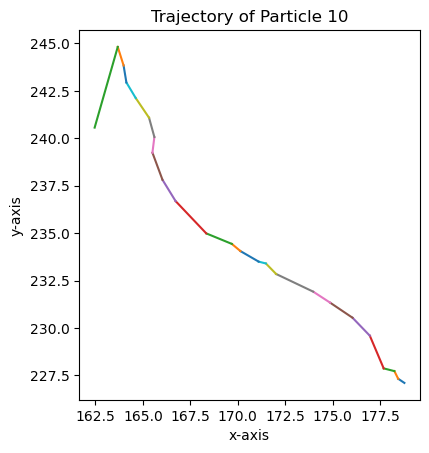

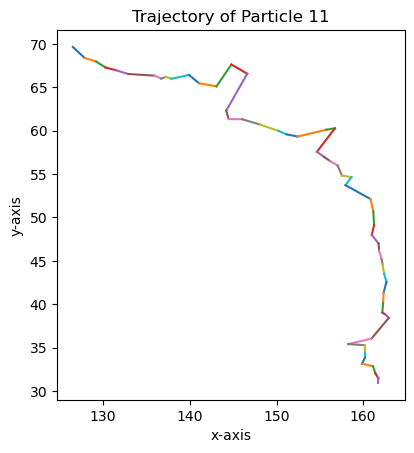

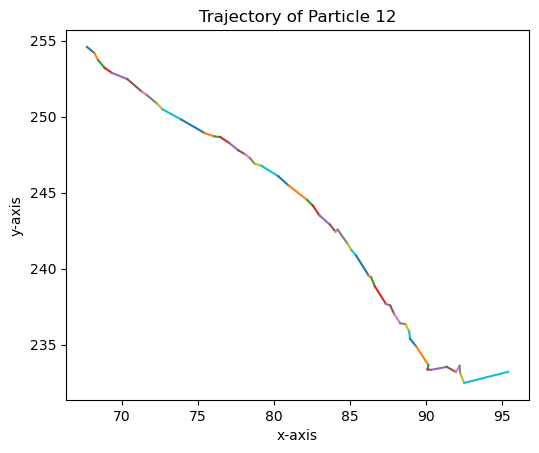

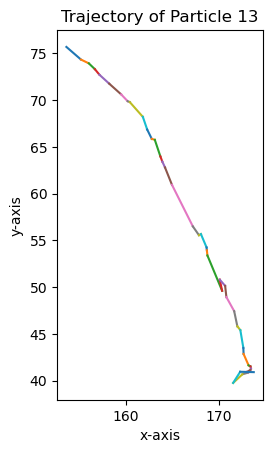

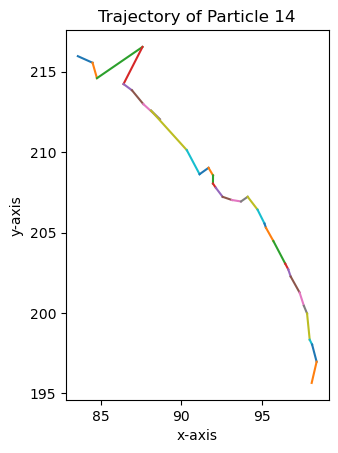

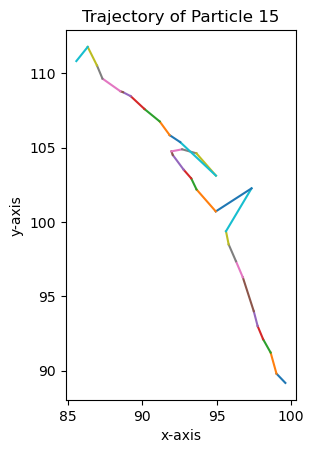

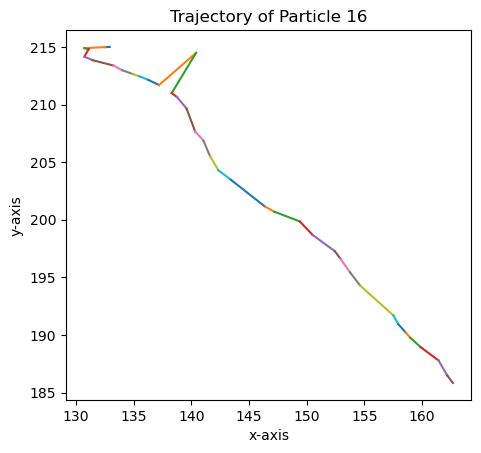

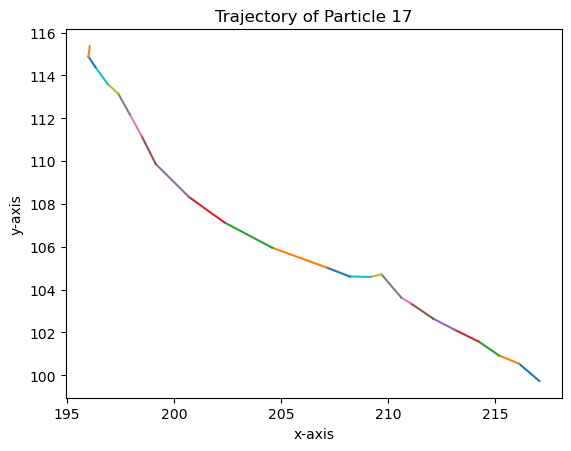

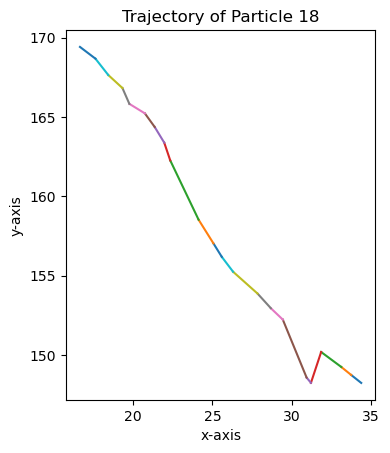

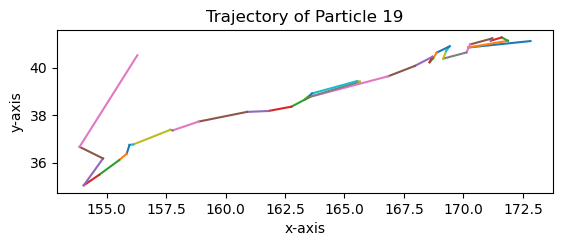

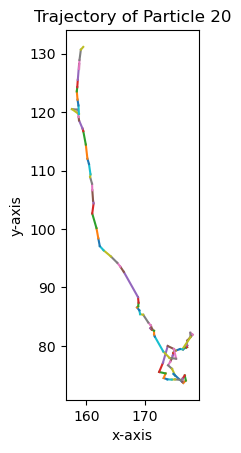

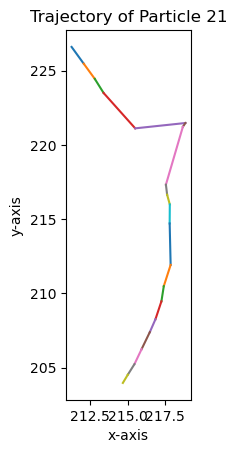

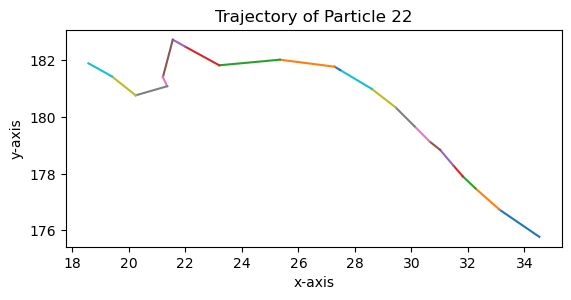

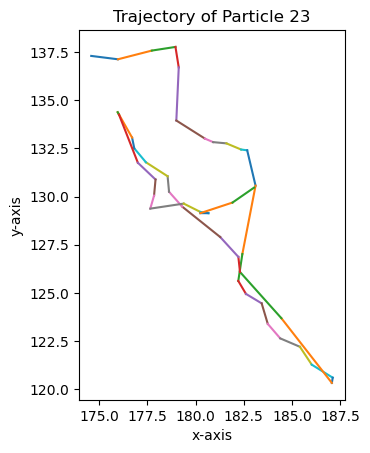

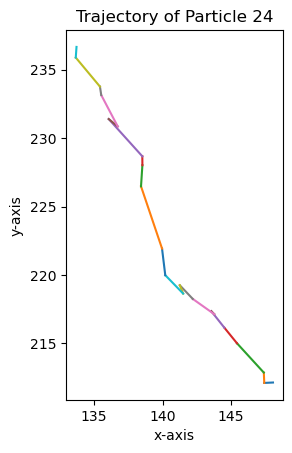

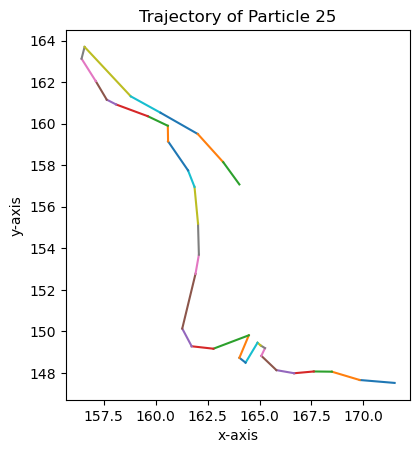

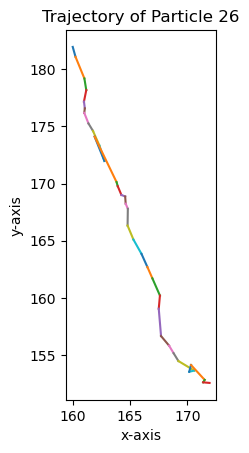

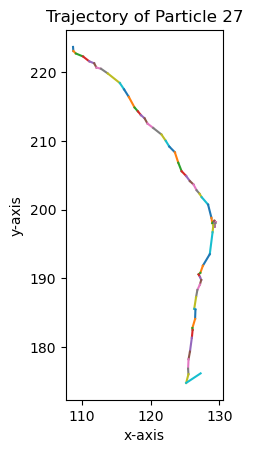

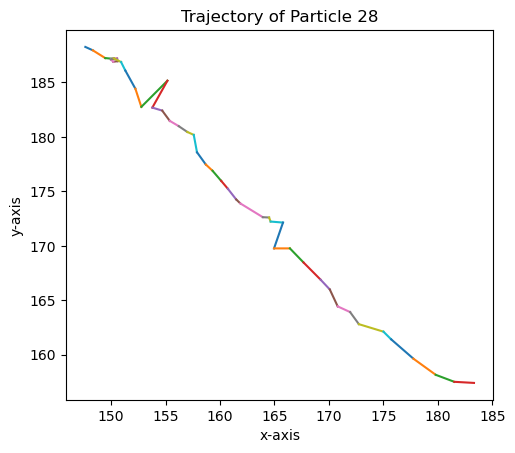

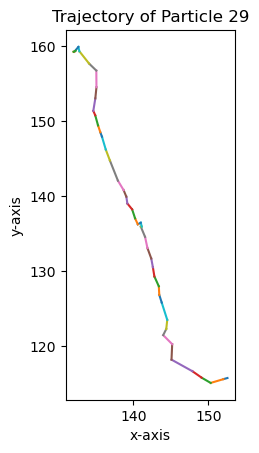

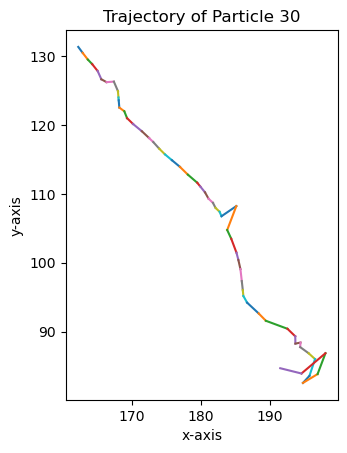

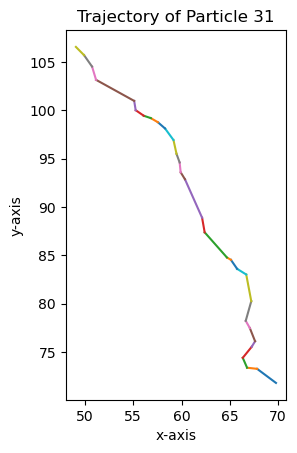

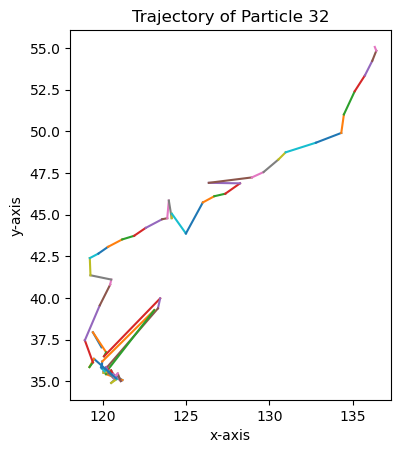

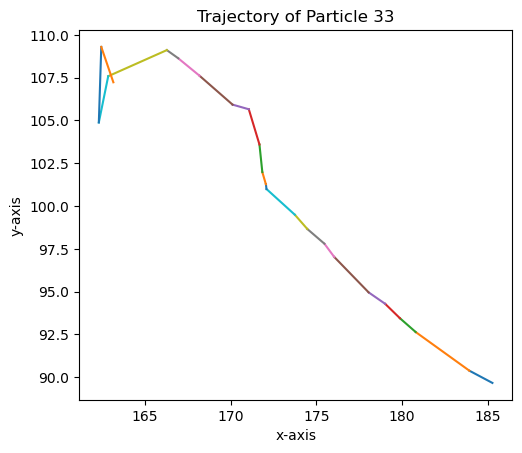

In [16]:
for p, df in dataframe1.groupby('ParticleID'):
    for i in range(1, len(df)):
        plt.plot(df['x'][i-1:i+1], df['y'][i-1:i+1])
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title('Trajectory of Particle {}'.format(p))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

## Analysing the points where the threshold is crossed and linear paths
### Change in color means the threshold is crossed

Total particles in the plot are: 33


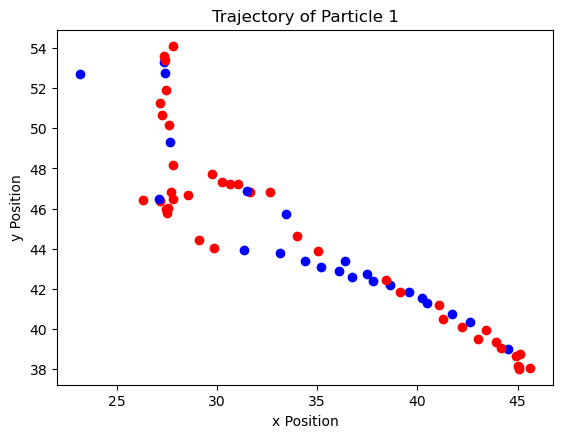

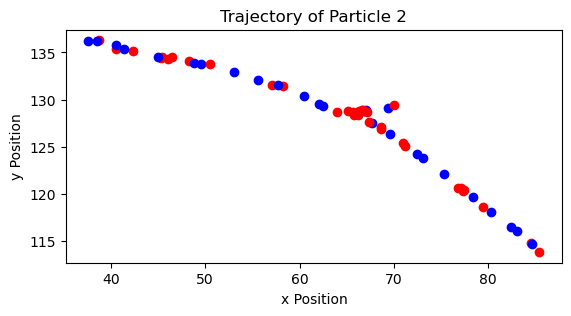

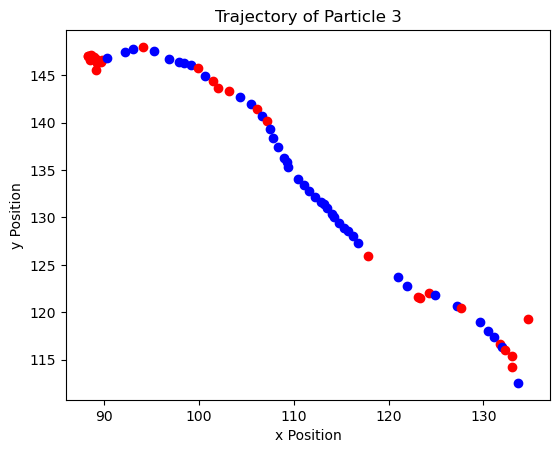

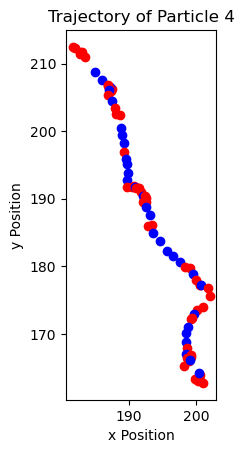

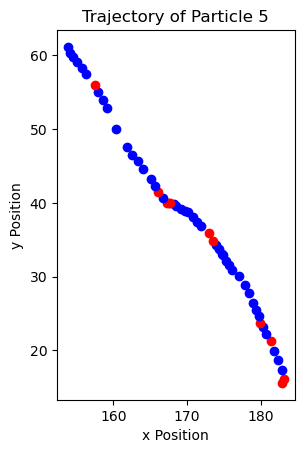

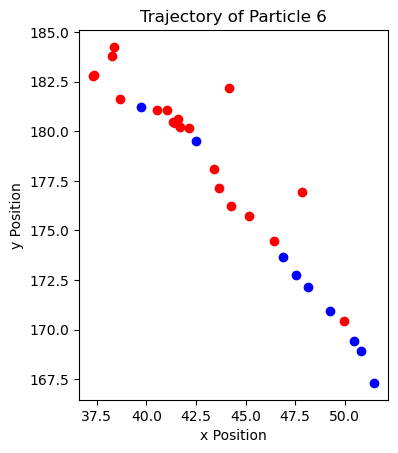

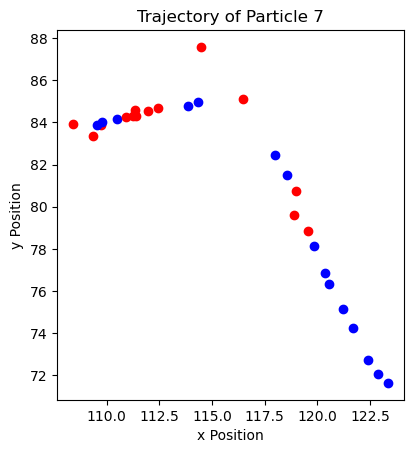

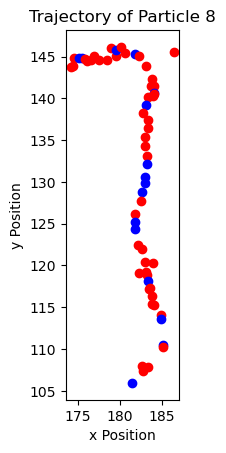

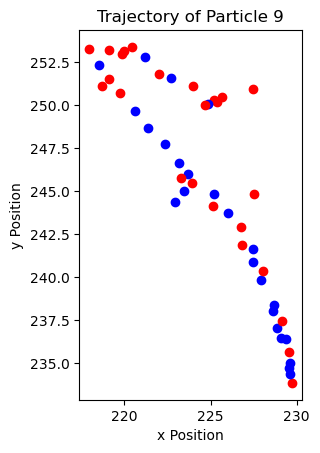

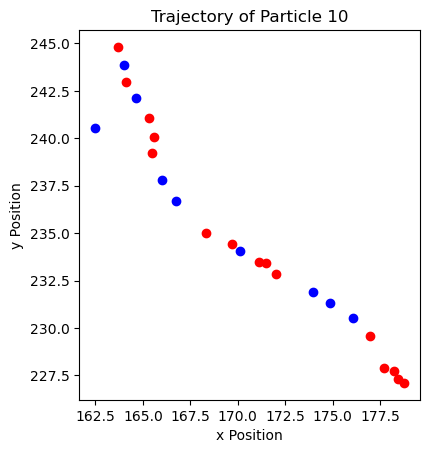

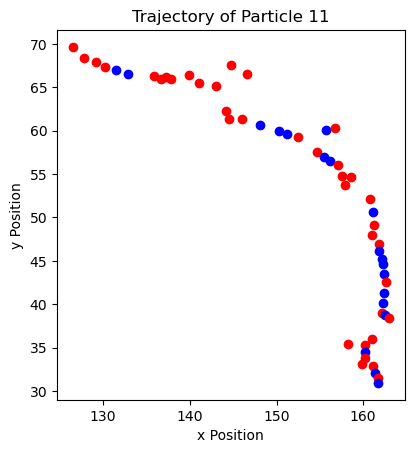

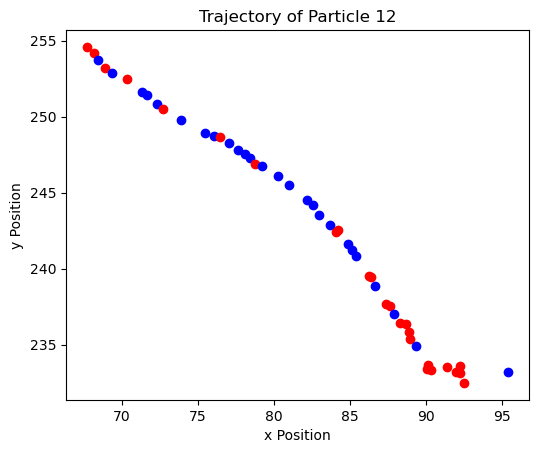

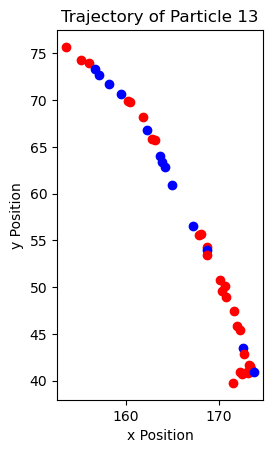

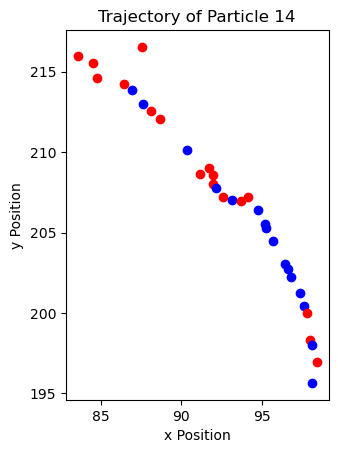

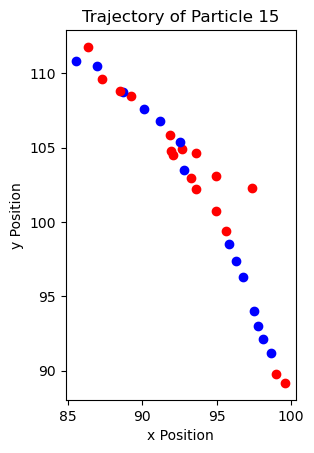

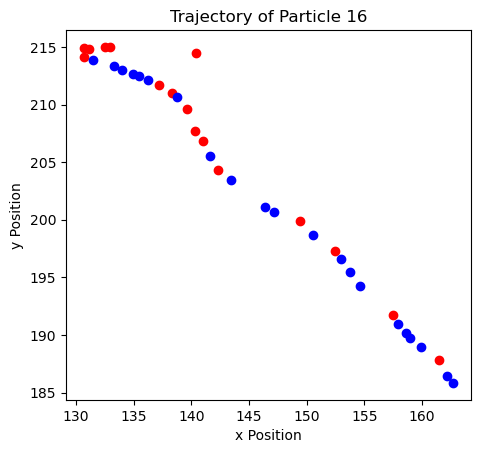

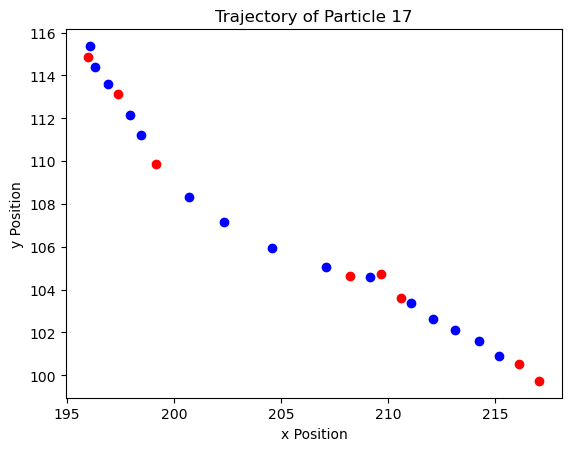

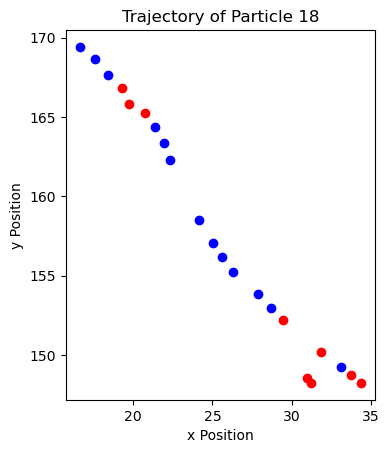

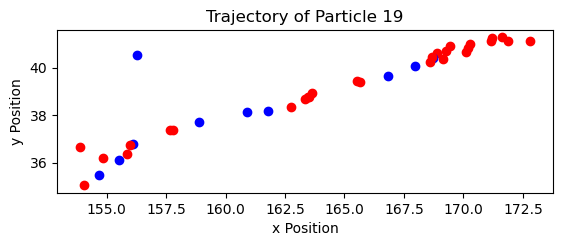

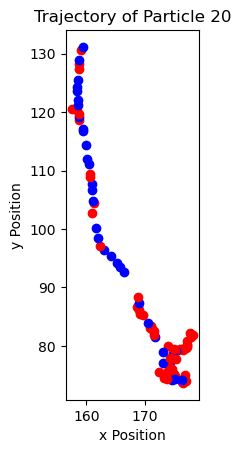

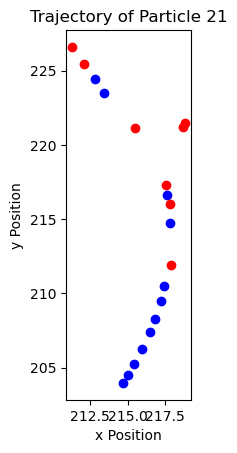

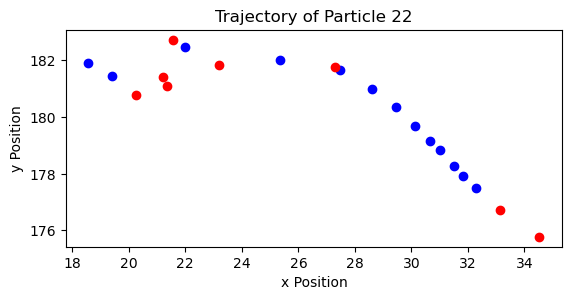

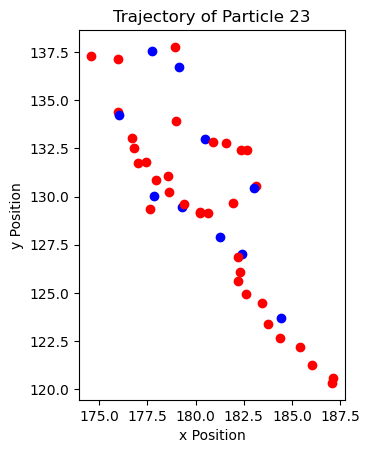

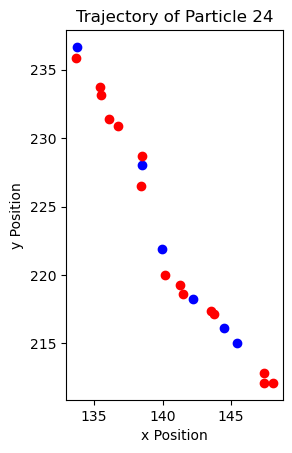

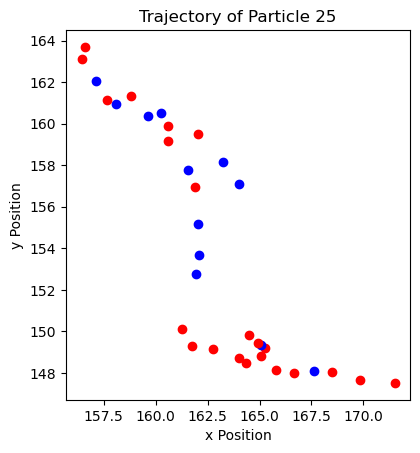

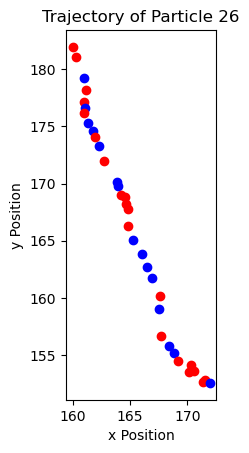

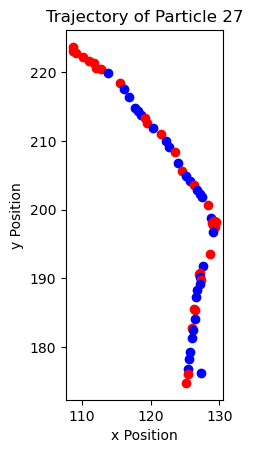

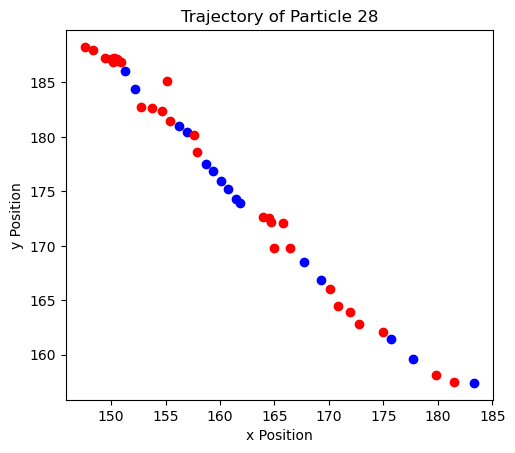

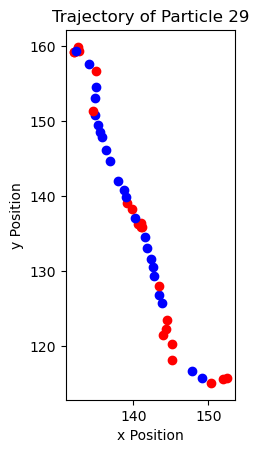

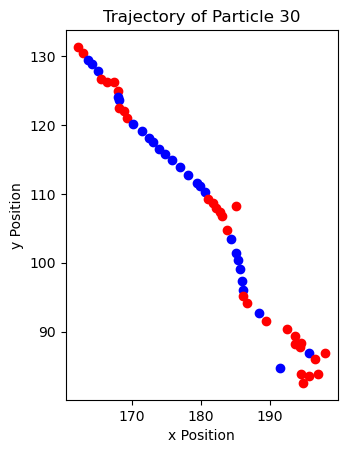

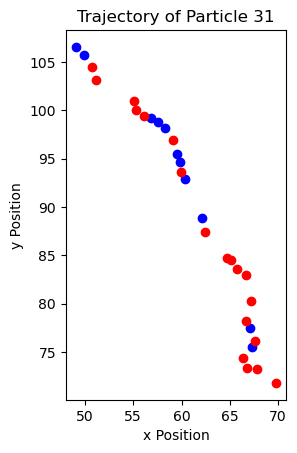

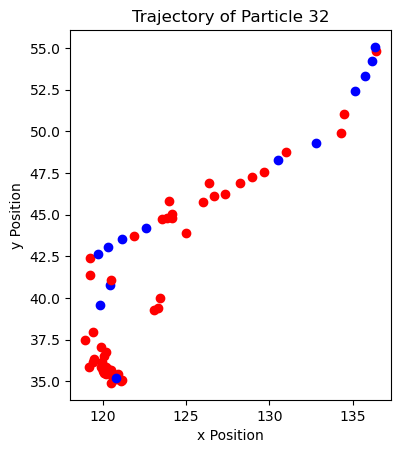

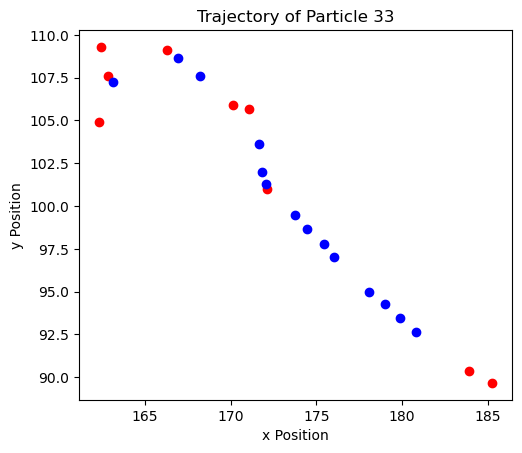

In [17]:
total_particles = dataframe1['ParticleID'].nunique()
print('Total particles in the plot are:', total_particles)

for particle in range(1, total_particles + 1):
    particle_data = dataframe1[dataframe1['ParticleID'] == particle]
    for i in range(len(particle_data)):
        if i>1 and particle_data.iloc[i]['angle(deg)']<15:
            color = 'b'
        else:
            color = 'r'
        plt.scatter(particle_data.iloc[i]['x'], particle_data.iloc[i]['y'], c=color)

    plt.xlabel('x Position')
    plt.ylabel('y Position')
    plt.title('Trajectory of Particle {}'.format(particle))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


## Analysing the displacement sizes (considered all steps)


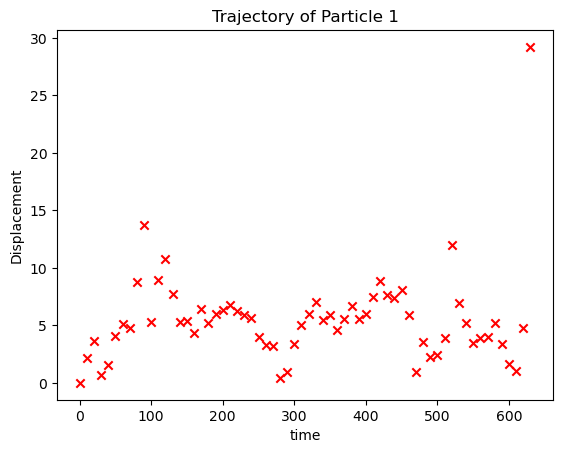

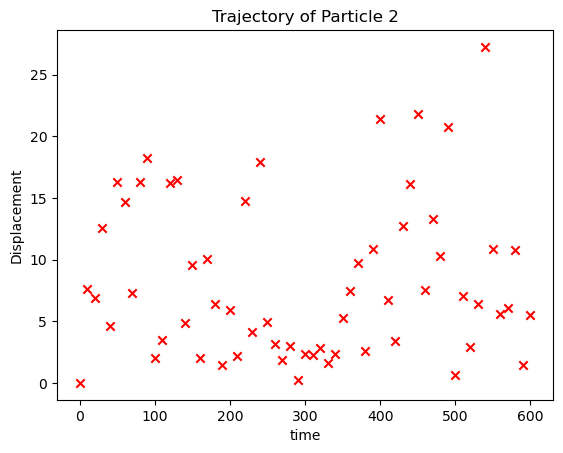

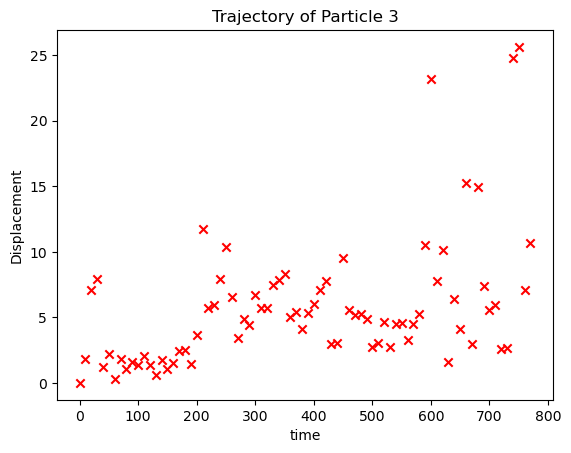

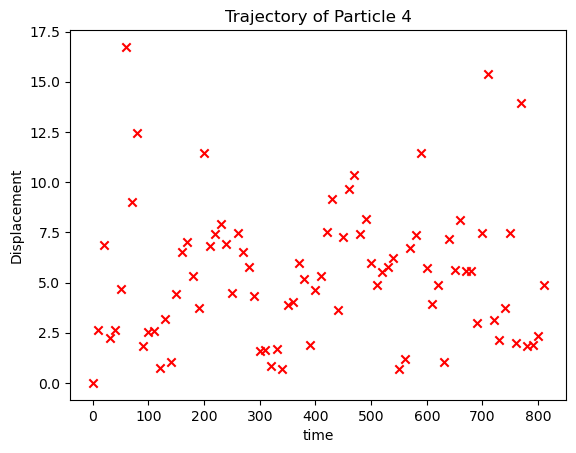

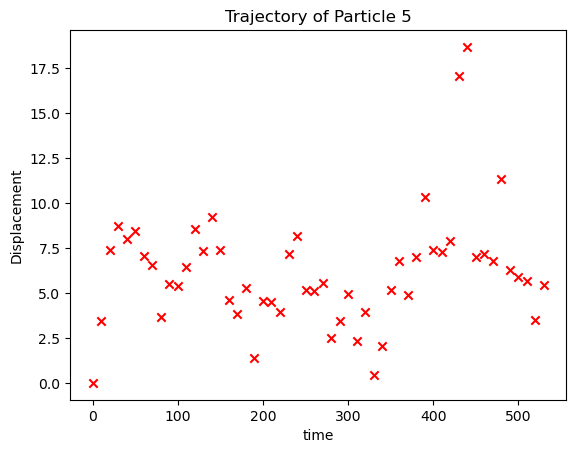

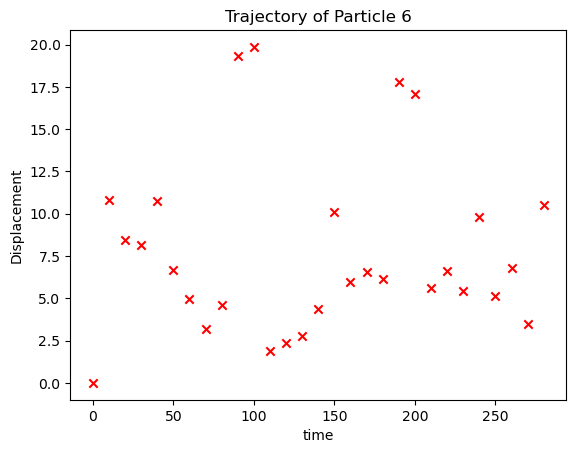

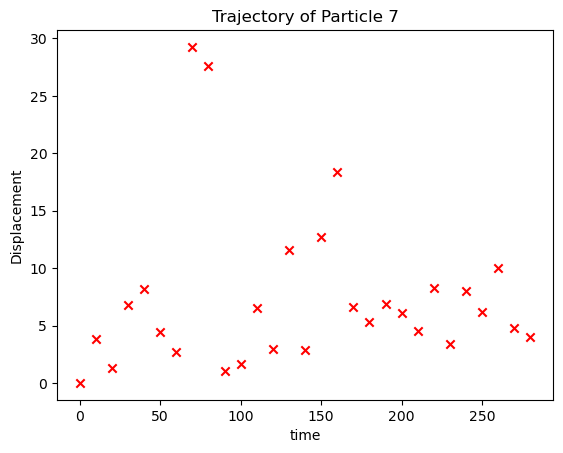

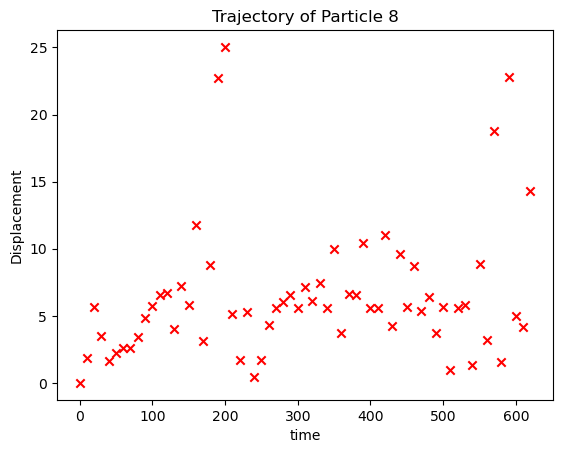

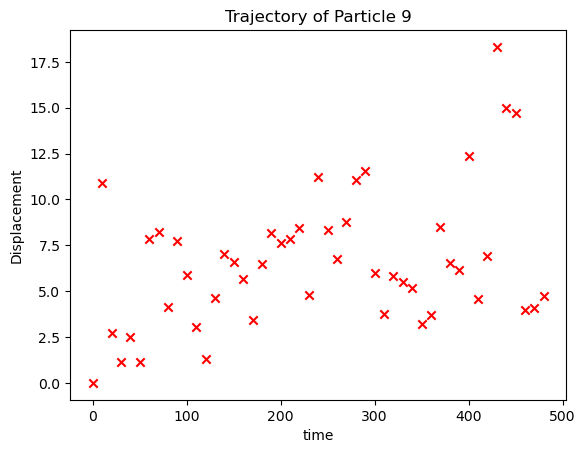

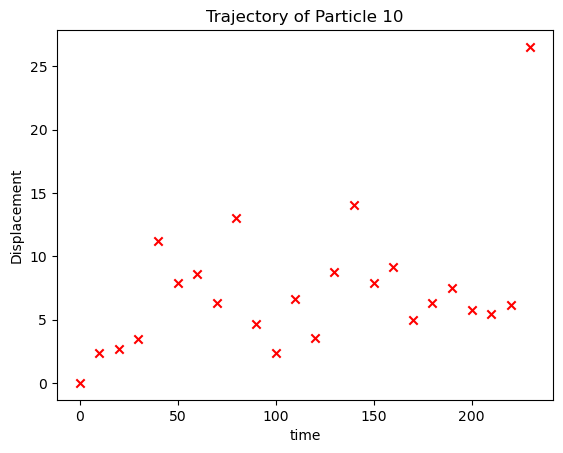

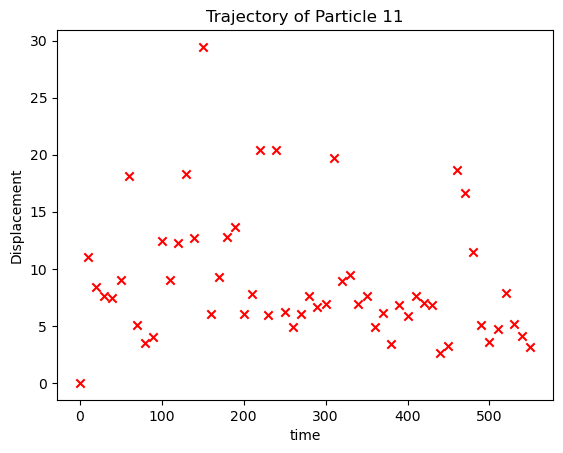

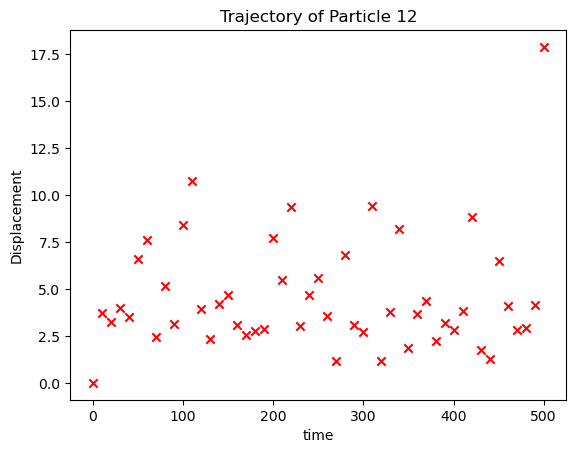

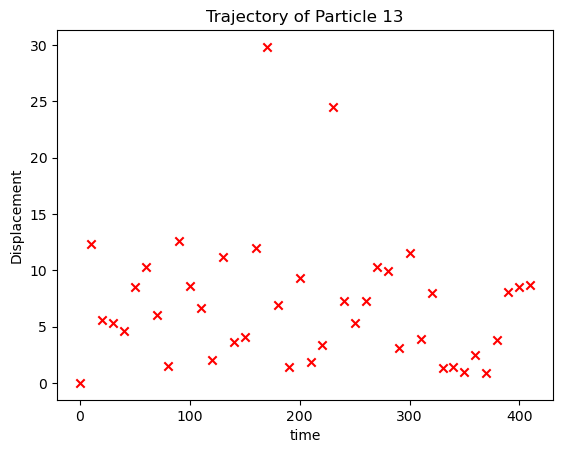

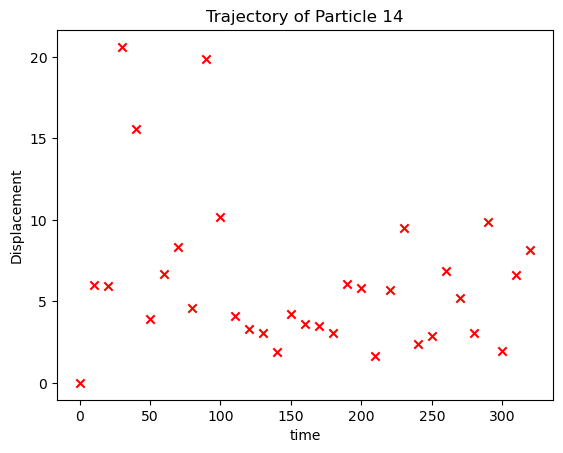

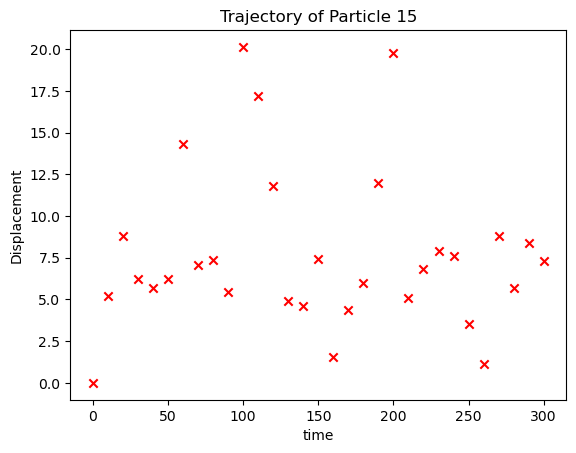

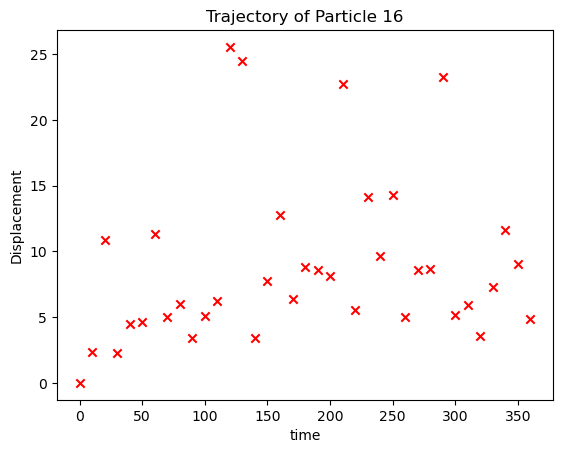

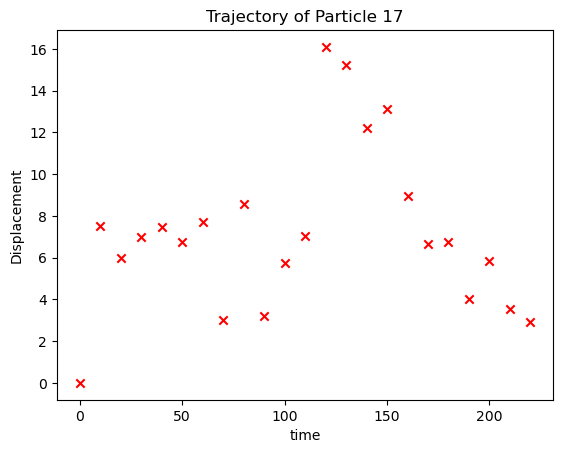

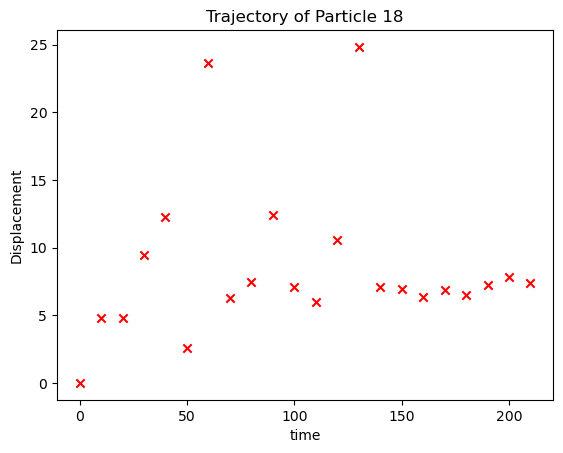

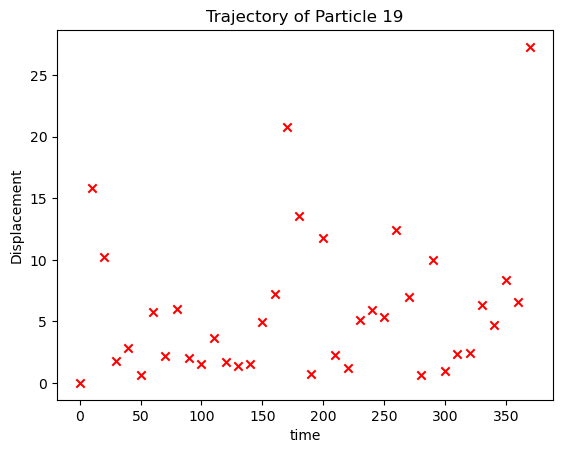

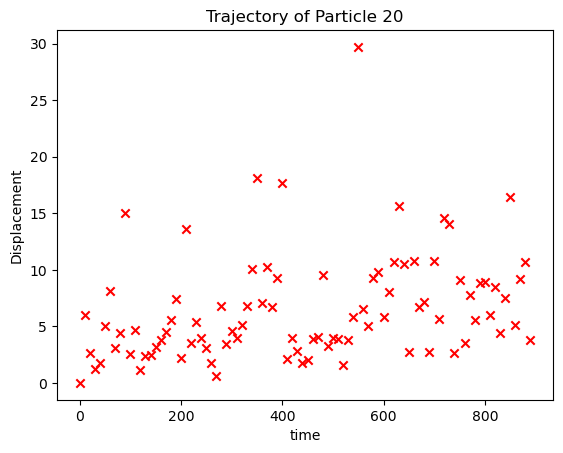

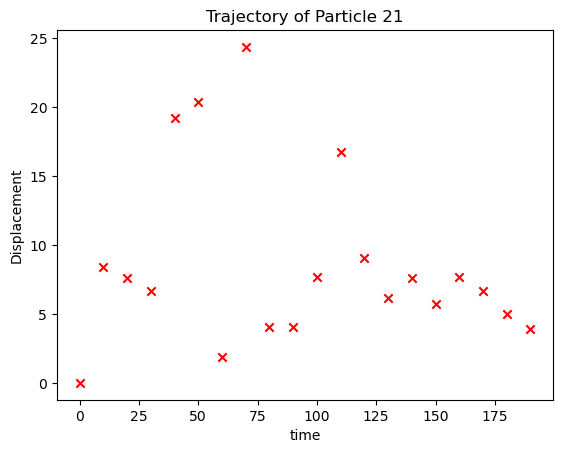

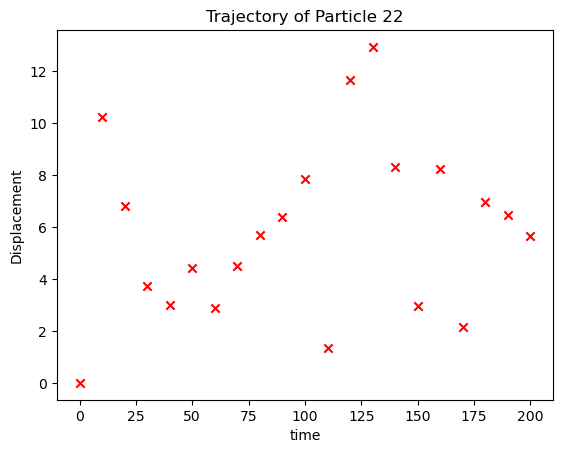

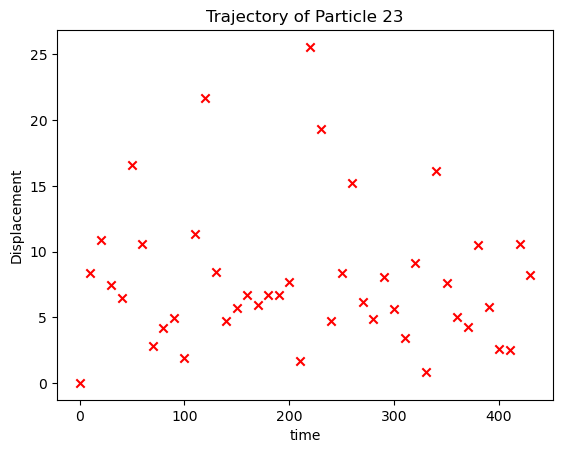

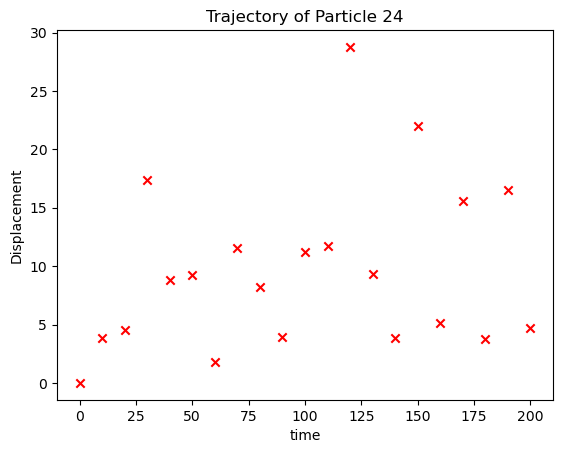

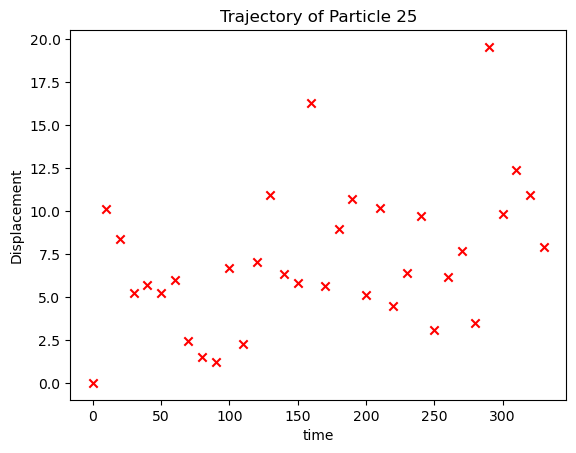

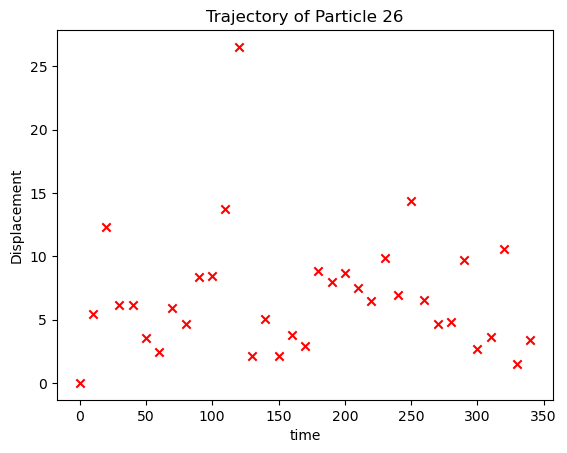

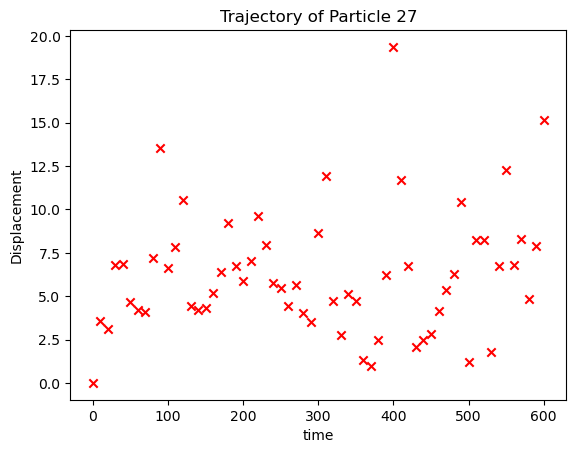

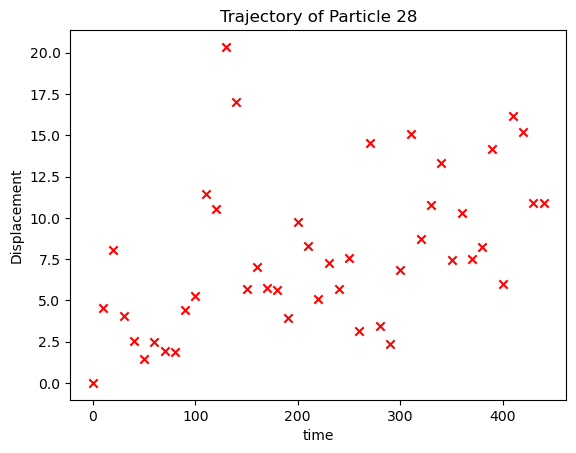

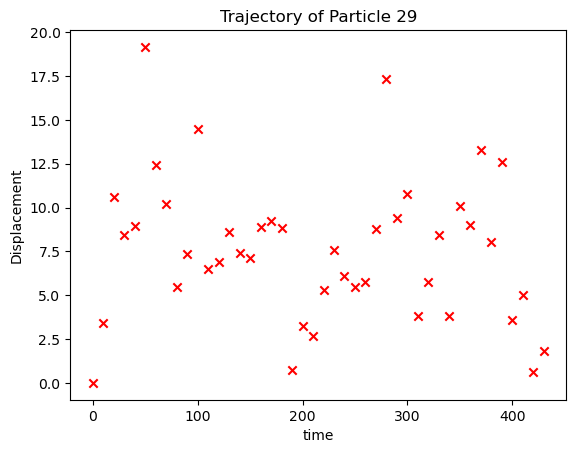

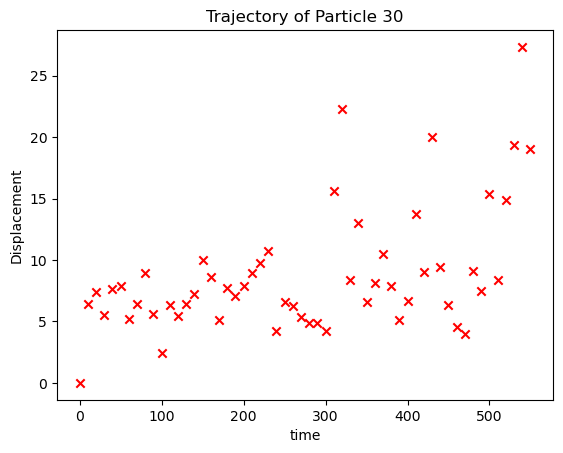

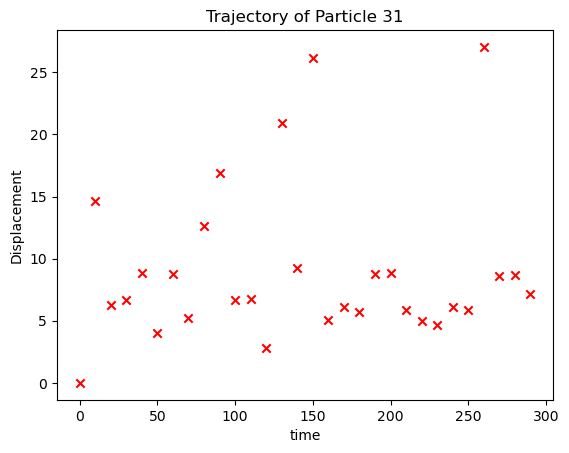

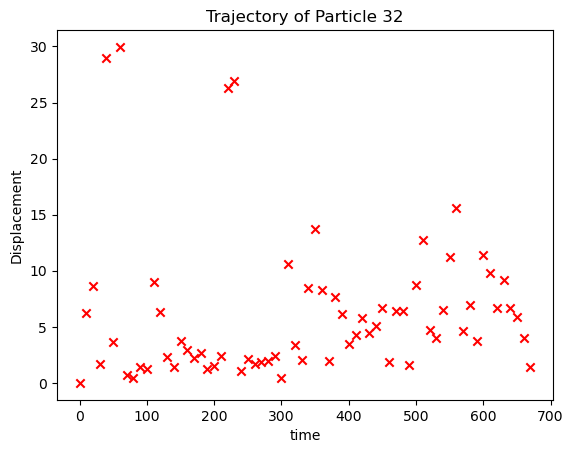

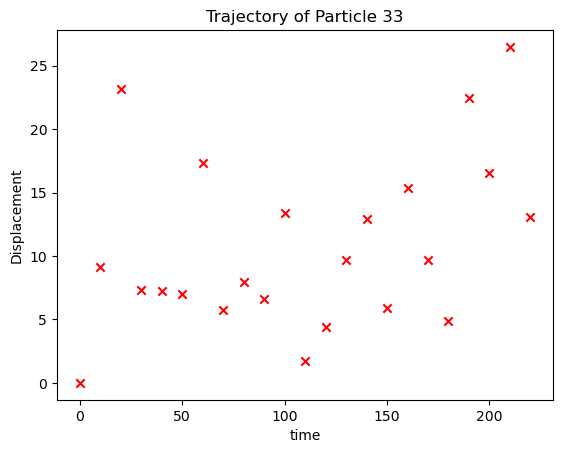

In [18]:
for p, df in dataframe1.groupby('ParticleID'):
    plt.scatter([t*10 for t in range(0, len(df))], df['displacement(nm)'], marker='x', color='red')
    plt.xlabel('time')
    plt.ylabel('Displacement')
    plt.title('Trajectory of Particle {}'.format(p))
    
    plt.show()

## marking the steps which are in linear path


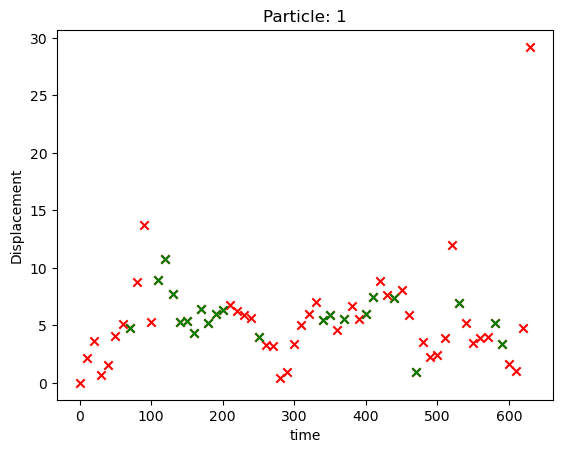

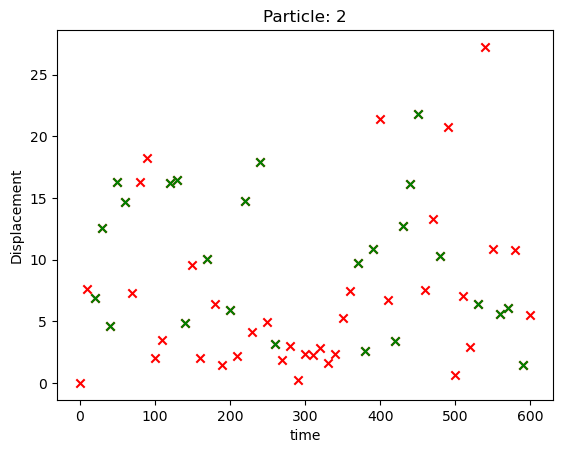

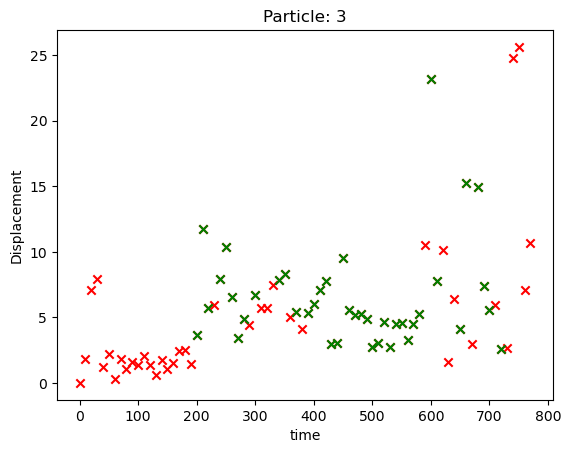

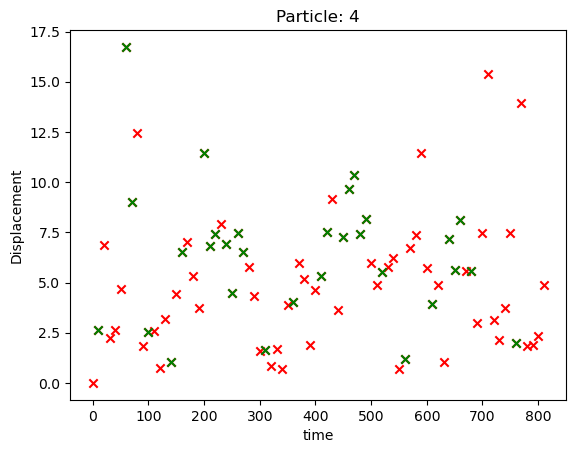

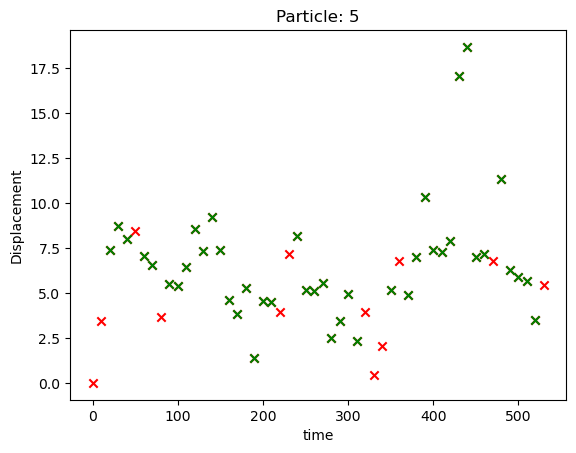

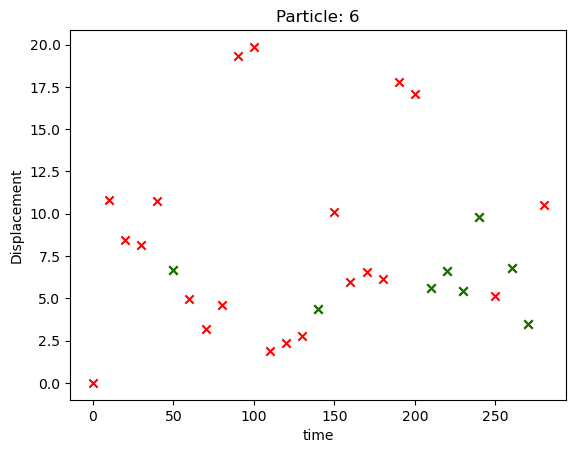

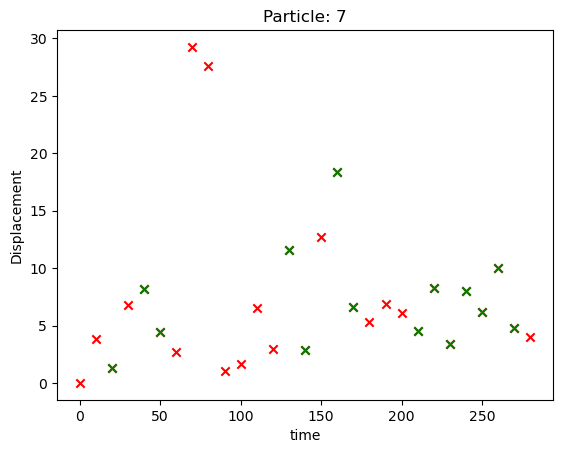

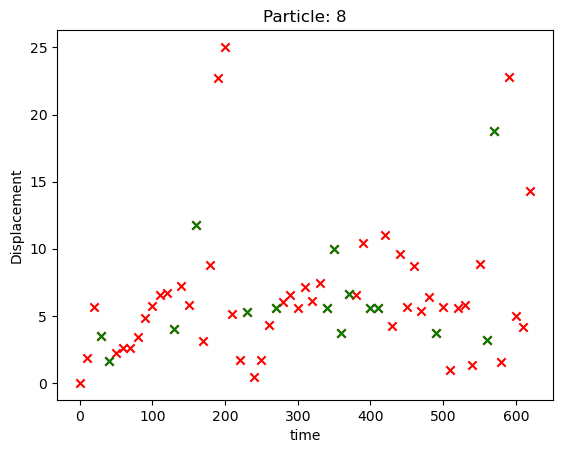

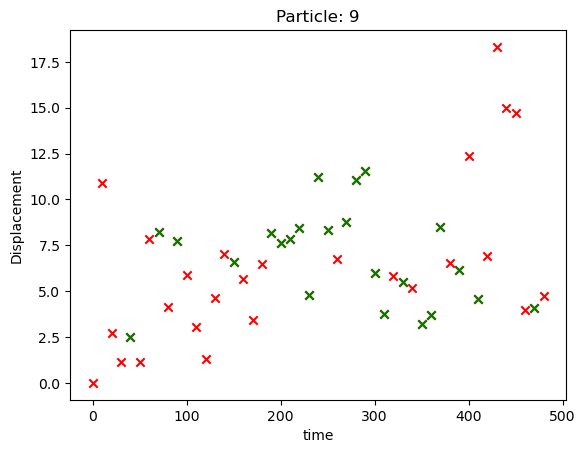

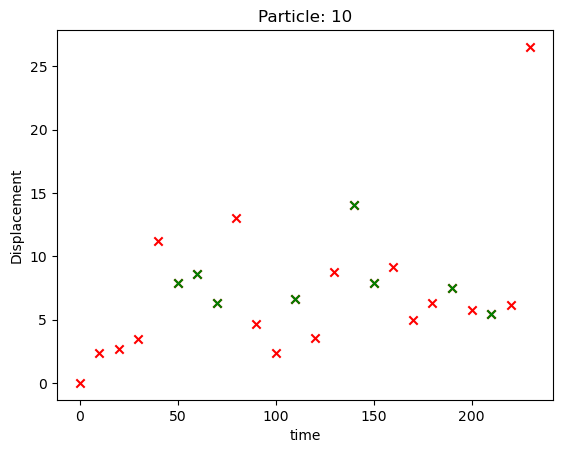

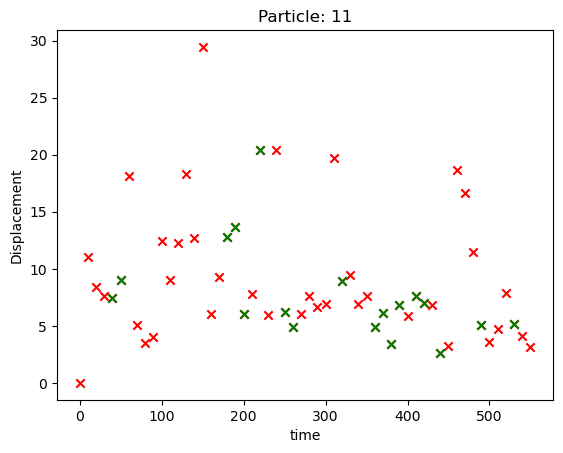

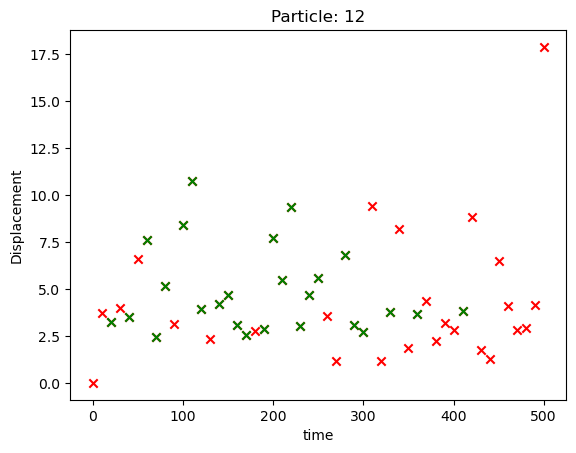

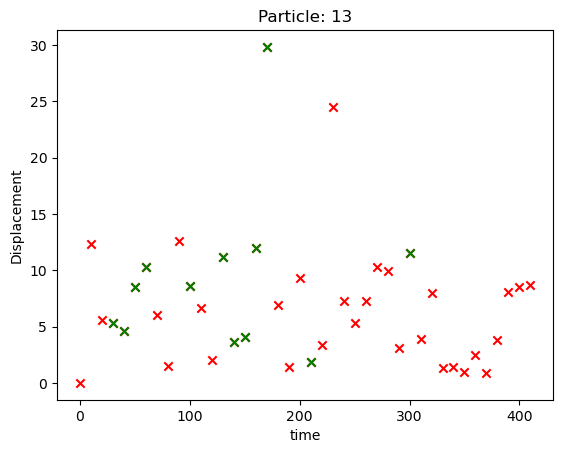

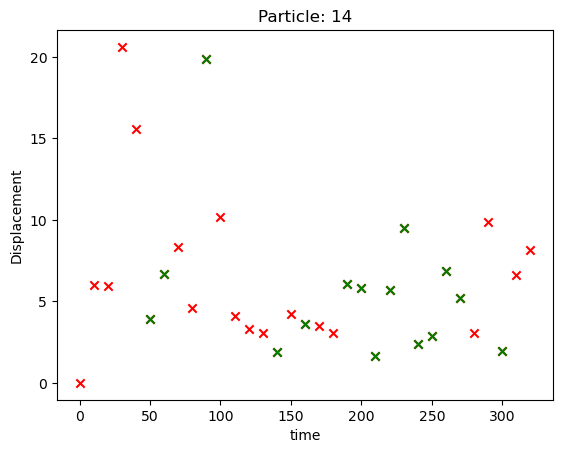

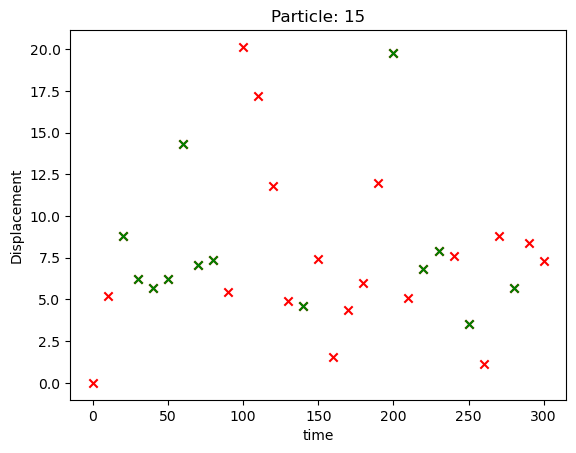

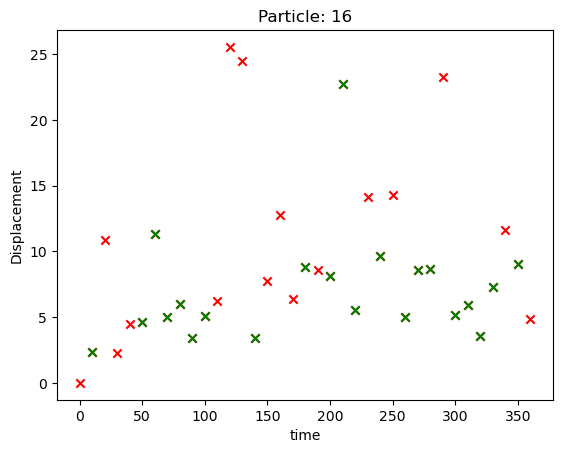

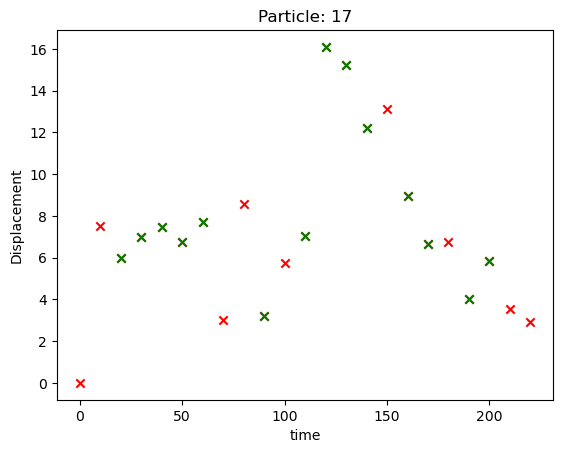

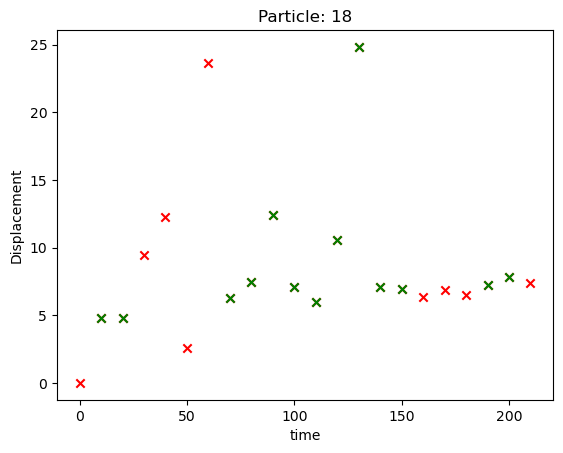

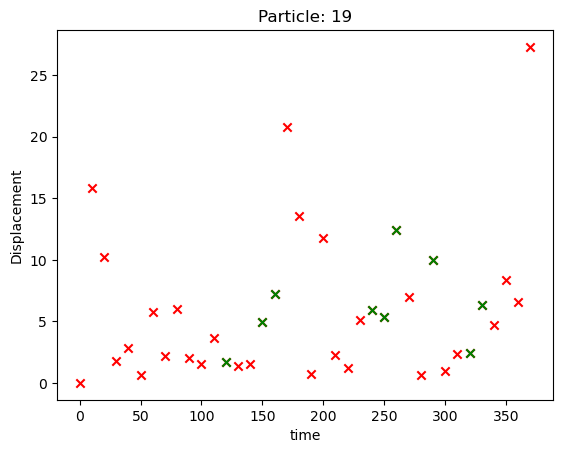

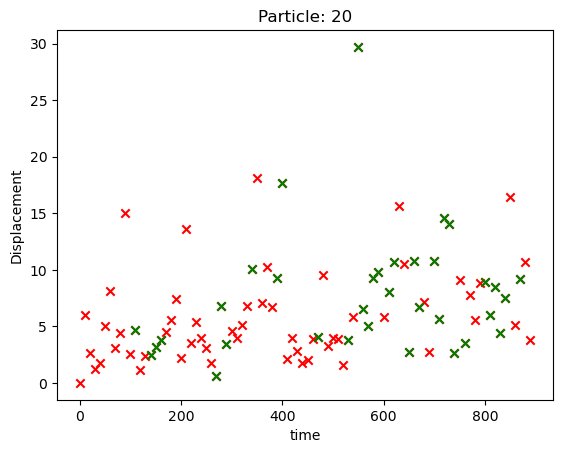

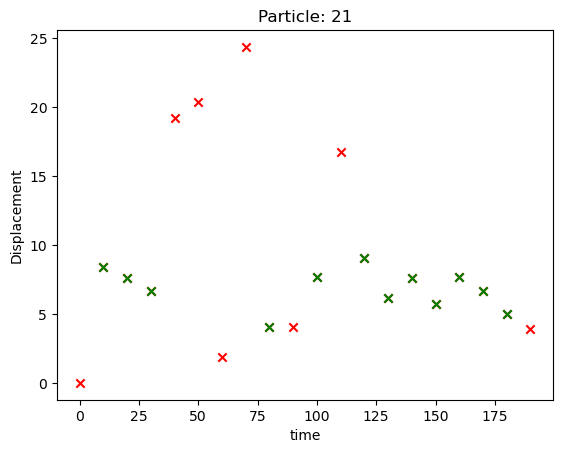

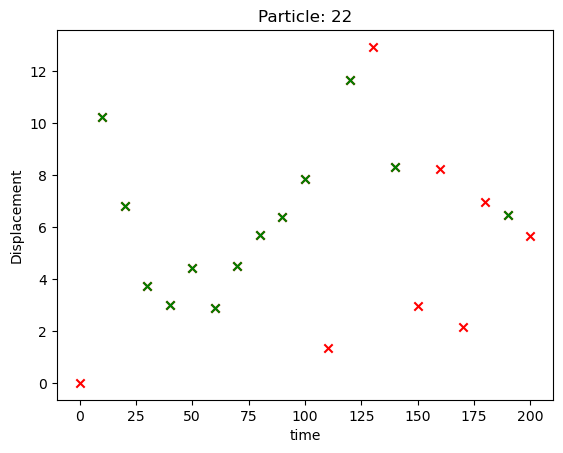

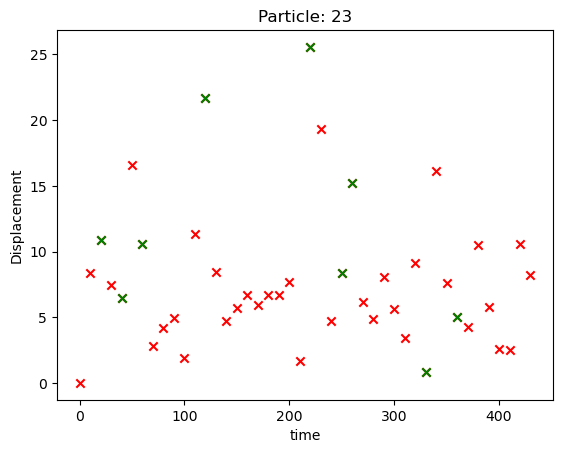

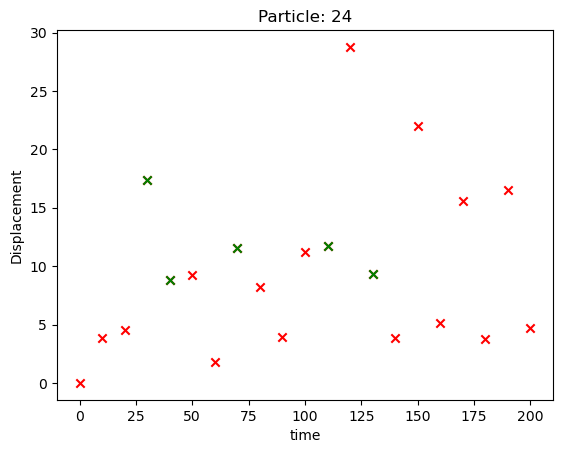

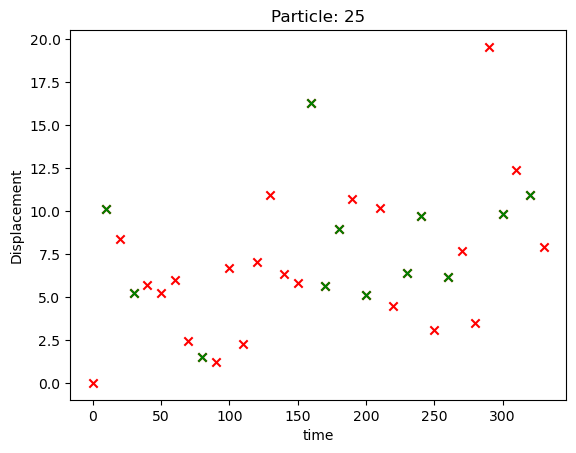

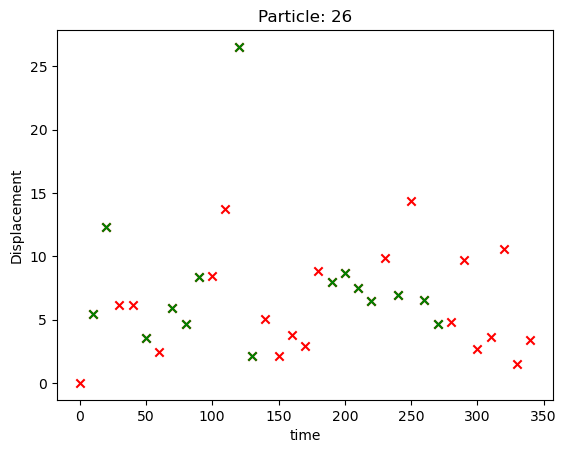

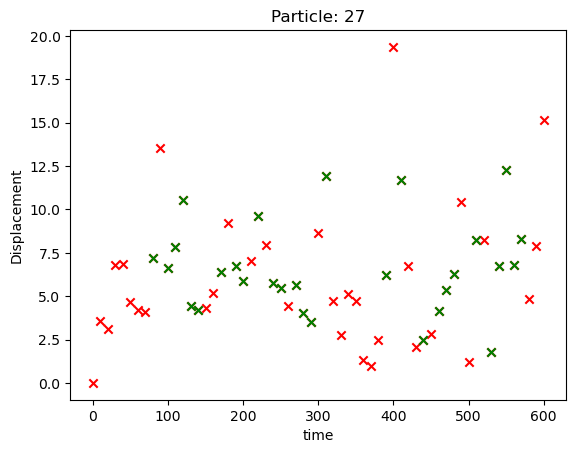

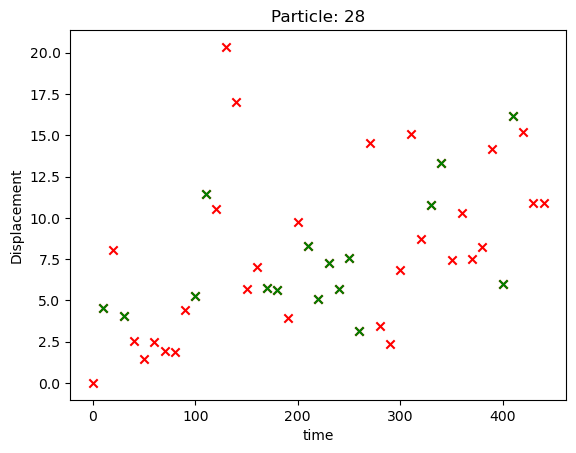

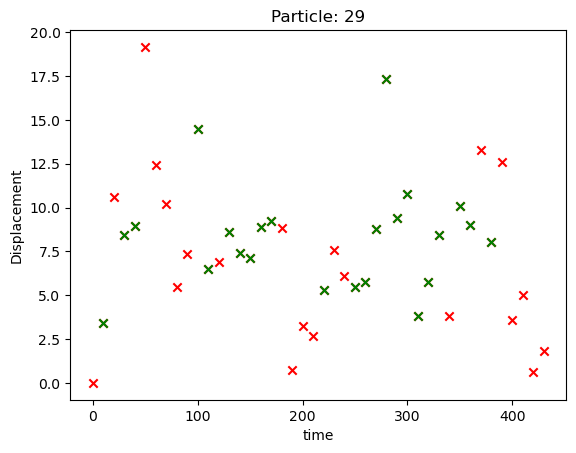

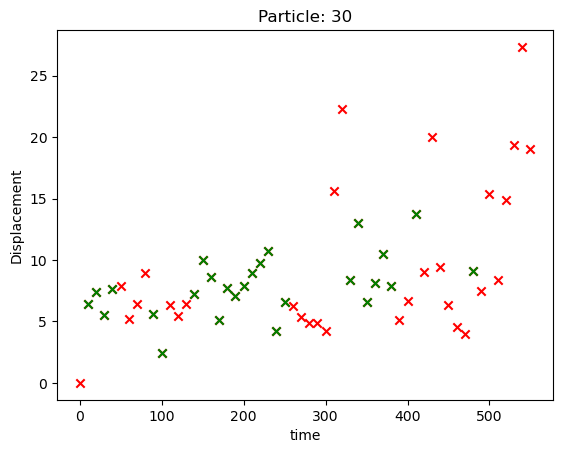

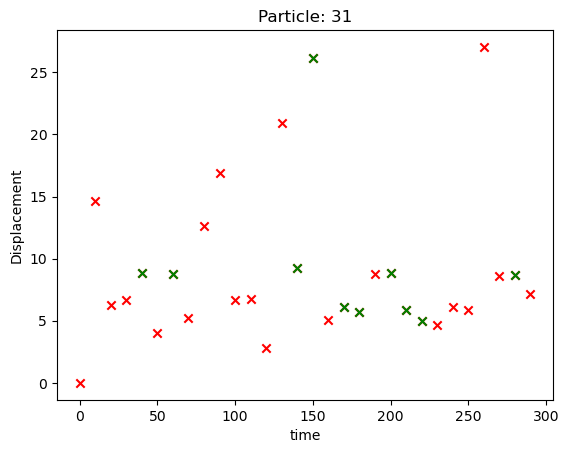

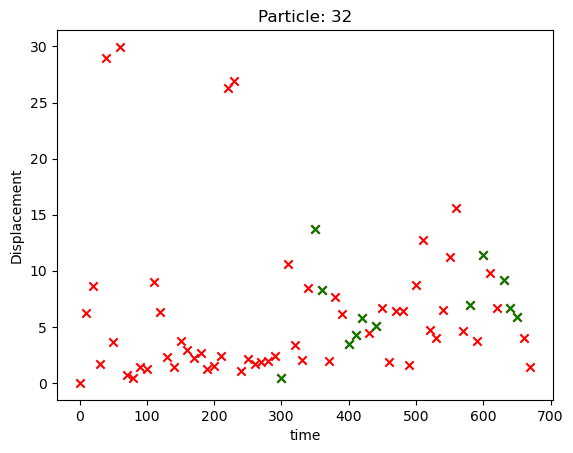

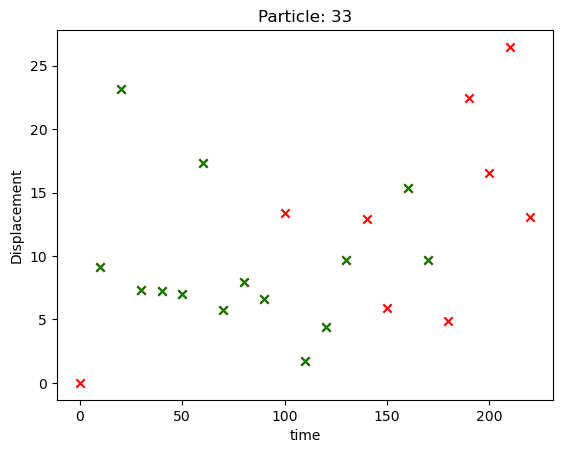

In [19]:
## here dataframe is after adding L2 and L3
for p, df in dataframe.groupby('ParticleID'):
    
    
    plt.scatter([t*10 for t in range(0, len(df))], df['displacement(nm)'], marker='x', color='red')
    plt.scatter(df[df['L2']==1]['time(ms)'], df[df['L2']==1]['displacement(nm)'], marker='x', color='green')
    plt.title('Particle: {}'.format(p))
    plt.xlabel('time')
    plt.ylabel('Displacement')
    plt.show()

In [20]:
def getAngle(x1, y1, x2, y2, x3, y3):
    a = np.array([x1, y1])
    b = np.array([x2, y2])
    c = np.array([x3, y3])
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return 180-(ang + 360 if ang < 0 else ang)


In [21]:
def getAngle(x1, y1, x2, y2, x3, y3):
    a = np.array([x1, y1])
    b = np.array([x2, y2])
    c = np.array([x3, y3])
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(b[1]-a[1], b[0]-a[0]))
#     ang = ang + 360 if ang < 0 else ang
    return (360-ang) if ang>180 else abs(ang)


In [22]:
def get_change_in_angle(x1, y1, x2, y2, x3, y3):
    a1 = np.degrees(calculate_direction_angle(x1, y1, x2, y2))
    a2 = np.degrees(calculate_direction_angle(x2, y2, x3, y3))
    ang = abs(a1-a2)
    print(a1, a2)
    return abs(360-ang) if ang>180 else abs(ang)


# Displacement analysis (@ 0.001 mM ATP)

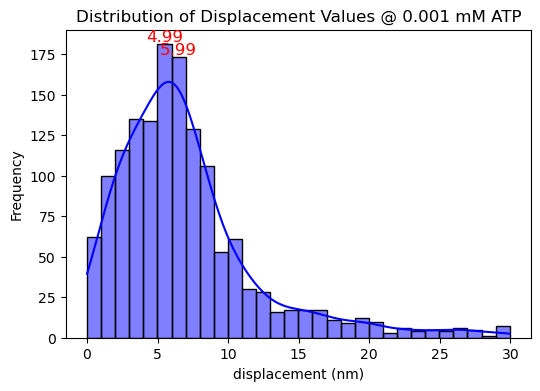

In [23]:

## Selecting the number of bins for visualisation 
# num_bins = int(np.sqrt(len(dataframe1)))
# num_bins = int(1 + math.log2(len(dataframe1)))
# std_deviation = np.std(dataframe1['displacement(nm)'])
# num_bins = int((max(dataframe1['displacement(nm)']) - min(dataframe1['displacement(nm)'])) / (3.5 * std_deviation / (len(dataframe1) ** (1/3))))

# Define the bin size (1 nm)
bin_size = 1

# Calculate the number of bins based on the data range and bin size
min_value = min(dataframe1['displacement(nm)'])
max_value = max(dataframe1['displacement(nm)'])
num_bins = int((max_value - min_value) / bin_size) + 1
###

plt.figure(figsize=(6, 4))
sns.histplot(dataframe1['displacement(nm)'], bins=num_bins, kde=True, color='blue', label='Displacements Histogram')

# Find bins with high frequencies
hist_data, bin_edges = np.histogram(dataframe1['displacement(nm)'], bins=num_bins)
threshold = np.max(hist_data) * 0.9  # Adjusted threshold

# Mark bins with high frequencies and place labels on the bars
for i, freq in enumerate(hist_data):
    if freq >= threshold:
        x_pos = (bin_edges[i] + bin_edges[i + 1]) / 2
        plt.annotate(f'{bin_edges[i]:.2f}', (x_pos, freq), ha='center', va='bottom', fontsize=12, color='red')

plt.xlabel('displacement (nm)')
plt.ylabel('Frequency')
plt.title('Distribution of Displacement Values @ 0.001 mM ATP')
plt.show()


In [24]:
## give df for which the excel is needed
import math
import numpy as np

def getAngle(x1, y1, x2, y2, x3, y3): # returns angle between two lines
        a = np.array([x1, y1])
        b = np.array([x2, y2])
        c = np.array([x3, y3])
        ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
        return ang + 360 if ang < 0 else ang
    

def get_steps_of_a_dataset(dataframe, threshold_angle):
    dataframe = dataframe
    new_order = ['ParticleID', 'x', 'y', 'displacement(nm)', 'angle(deg)', 'time(ms)']
    dataframe = dataframe.reindex(columns=new_order)

    dataframe['L2'] = 0
    dataframe['L3'] = 0
    dataframe['L4'] = 0
    
    for i in range(1, len(dataframe)-1):
            x1, y1, p1 = dataframe.iloc[i-1]['x'], dataframe.iloc[i-1]['y'], dataframe.iloc[i-1]['ParticleID']
            x2, y2, p2 = dataframe.iloc[i]['x'], dataframe.iloc[i]['y'], dataframe.iloc[i]['ParticleID']
            x3, y3, p3 = dataframe.iloc[i+1]['x'], dataframe.iloc[i+1]['y'], dataframe.iloc[i+1]['ParticleID']
            if p1==p2==p3 and abs(180-getAngle(x1, y1, x2, y2, x3, y3)) < threshold_angle:
    #             print(getAngle(x1, y1, x2, y2, x3, y3))
                dataframe.loc[i, 'L2'] = 1


    for i in range(2, len(dataframe)-1):
            x1, y1, p1 = dataframe.iloc[i-2]['x'], dataframe.iloc[i-2]['y'], dataframe.iloc[i-2]['ParticleID']
            x2, y2, p2 = dataframe.iloc[i-1]['x'], dataframe.iloc[i-1]['y'], dataframe.iloc[i-1]['ParticleID']
            x3, y3, p3 = dataframe.iloc[i]['x'], dataframe.iloc[i]['y'], dataframe.iloc[i]['ParticleID']
            x4, y4, p4 = dataframe.iloc[i+1]['x'], dataframe.iloc[i+1]['y'], dataframe.iloc[i+1]['ParticleID']
            if p1==p2==p3==p4 and abs(180-getAngle(x1, y1, x2, y2, x3, y3)) < threshold_angle and \
                                  abs(180-getAngle(x2, y2, x3, y3, x4, y4)) < threshold_angle:
    #             print(getAngle(x1, y1, x2, y2, x3, y3), getAngle(x2, y2, x3, y3, x4, y4))
                dataframe.loc[i, 'L3'] = 1

    for i in range(2, len(dataframe)-2):
            x1, y1, p1 = dataframe.iloc[i-2]['x'], dataframe.iloc[i-2]['y'], dataframe.iloc[i-2]['ParticleID']
            x2, y2, p2 = dataframe.iloc[i-1]['x'], dataframe.iloc[i-1]['y'], dataframe.iloc[i-1]['ParticleID']
            x3, y3, p3 = dataframe.iloc[i]['x'], dataframe.iloc[i]['y'], dataframe.iloc[i]['ParticleID']
            x4, y4, p4 = dataframe.iloc[i+1]['x'], dataframe.iloc[i+1]['y'], dataframe.iloc[i+1]['ParticleID']
            x5, y5, p5 = dataframe.iloc[i+2]['x'], dataframe.iloc[i+2]['y'], dataframe.iloc[i+2]['ParticleID']
            if p1==p2==p3==p4==p5 and abs(180-getAngle(x1, y1, x2, y2, x3, y3)) < threshold_angle and \
                                     abs(180-getAngle(x2, y2, x3, y3, x4, y4)) < threshold_angle and \
                                     abs(180-getAngle(x3, y3, x4, y4, x5, y5)) < threshold_angle:
    #             print(getAngle(x1, y1, x2, y2, x3, y3), getAngle(x2, y2, x3, y3, x4, y4))
                dataframe.loc[i, 'L4'] = 1
    print('Total L2:', sum(dataframe['L2']==1))
    print('Total L3:', sum(dataframe['L3']==1))
    print('Total L4:', sum(dataframe['L4']==1))
    return dataframe
df = get_steps_of_a_dataset(dataframe1, 30)
## give filename to save with this name
# df.to_excel('L2 L3 L4 30degree {} mM ATP.xlsx'.format(all_conc[0]), index=False)

Total L2: 867
Total L3: 647
Total L4: 516


In [25]:
'L2-L3-L4-{} mM ATP.xlsx'.format(all_conc[6])

'L2-L3-L4-2.000 mM ATP.xlsx'

# The function for getting histogram of a df

In [35]:

def calculate_direction_angle(x1, y1, x2, y2):
    # Calculate the direction angle between two points (x1, y1) and (x2, y2)
    delta_x = x2 - x1
    delta_y = y2 - y1
    return np.arctan2(delta_y, delta_x)
def getAngle(x1, y1, x2, y2, x3, y3):
    a = np.array([x1, y1])
    b = np.array([x2, y2])
    c = np.array([x3, y3])
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return 180-(ang + 360 if ang < 0 else ang)

## contains the dataframe of linear paths with stepsize = 2, 3, 4(namely: 2stepD, 3stepD, 4stepD)
linear_df = {}

## will contain the displacements for min step of linear paths (2/3/4) in corresponding ATP conc
linear_segments_minStep2 = {'0.001':[], '0.025':[], '0.050':[], '0.100':[], '0.250':[], '0.500':[], '2.000':[]}
linear_segments_minStep3 = {'0.001':[], '0.025':[], '0.050':[], '0.100':[], '0.250':[], '0.500':[], '2.000':[]}
linear_segments_minStep4 = {'0.001':[], '0.025':[], '0.050':[], '0.100':[], '0.250':[], '0.500':[], '2.000':[]}

def histogram(dataframe, steps, conc, threshold): 
    # steps - no of minimum steps in the linear path
    # conc - provide the concentration for which the analysis is being done
    all_concentrations = ['0.001', '0.025', '0.050', '0.100', '0.250', '0.500', '2.000']
    if conc not in all_concentrations:
        print('Error!! Provide conc from {}'.format(all_concentrations))
        return 
    
    
    # this will contain the linear segments of a particle
    linear_segments = []

    for particle_id, group in dataframe.groupby('ParticleID'):
        x_values = group['x'].values
        y_values = group['y'].values
        t_values = group['time(ms)'].values
        trajectory_values = group['displacement(nm)'].values
        linear_segment = [(x_values[0], y_values[0], t_values[0], particle_id), 
                          (x_values[1], y_values[1], t_values[1], particle_id)] ## (x, y, time, particleID)

        prev_dir_coordinates = [(x_values[0], y_values[0]), (x_values[1], y_values[1])]

        for i in range(2, len(group)):
            (x1, y1), (x2, y2) = prev_dir_coordinates
            x3, y3 = x_values[i], y_values[i]
            direction_change = abs(getAngle(x1, y1, x2, y2, x3, y3))
            # threshold for direction change indicating a linear segment
            direction_threshold = threshold  # in degrees #can be Adjusted 

            if direction_change <= direction_threshold:
                linear_segment.append((x_values[i], y_values[i], t_values[i], particle_id))

            else:
                # Direction change indicates a turn, so start a new linear segment
                if len(linear_segment) > 2:
                    linear_segments.append(linear_segment)

                linear_segment = [(linear_segment[-1]), (x_values[i], y_values[i], t_values[i], particle_id)]

            prev_dir_coordinates = [(x_values[i-1], y_values[i-1]), (x_values[i], y_values[i])]
        # Add the last segment if it's linear
        if len(linear_segment) > 2:
            linear_segments.append(linear_segment)
    
    # 'linear_segments' now contains linear segments of trajectories
    ## getting the coordinates of linear paths for different step sizes
    for path in linear_segments:
        if (len(path) > 2) and steps==2: # for steps >= 2
            linear_segments_minStep2[str(conc)].append(path)
        if (len(path) > 3) and steps==3: # for steps >= 3
            linear_segments_minStep3[str(conc)].append(path)
        if (len(path) > 4) and steps==4: # for steps >= 4
            linear_segments_minStep4[str(conc)].append(path)


    ## converting the linear parts into displacements

    linear_displacements = [] # contains the linear steps only of the linear paths
    count = 0 ## counts the number of steps taken into consiration for analysis
    
    for positions in linear_segments:
        if (len(positions) > steps):  ########  -> n+1 points for n steps #############
            
            for i in range(1, len(positions)):
            # Calculated and stored the displacement (for the linear paths)
                x1, y1 = positions[i-1][0], positions[i-1][1]
                x2, y2 = positions[i][0], positions[i][1]
                d = 6*((x2-x1)**2 + (y2-y1)**2)**0.5
                if d<60:
                    linear_displacements.append(d)
                    count += 1 
    print('Total data points:', count)
    print('The average displacement of all points:', dataframe['displacement(nm)'].mean())
    print('The average displacement after filtering:', sum(linear_displacements)/len(linear_displacements))



    ## getting the linear displacements in a dataframe
    linear_df['{} mM ATP Steps >= {}'.format(conc, steps)] = linear_displacements


    # Define the bin size (1 nm)
    bin_size = 1

    # Calculate the number of bins based on the data range and bin size
    min_value = min(linear_displacements)
    max_value = max(linear_displacements)
    num_bins = int((max_value - min_value) / bin_size) + 1
    ###


    plt.figure(figsize=(6, 4))

    # Plot the histogram
    sns.histplot(linear_displacements, bins=num_bins, kde=True, color='blue', label='Steps>={}'.format(steps))

    # Find bins with high frequencies
    hist_data, bin_edges = np.histogram(linear_displacements, bins=num_bins)
    threshold = np.max(hist_data) * 0.99  # Adjusted threshold

    # Find the bin with the highest frequency
    max_bin_index = np.argmax(hist_data)
    max_bin_x = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2
    max_bin_freq = hist_data[max_bin_index]

    # Mark the bin with the highest frequency
    # plt.axvline(x=max_bin_x, color='red', linestyle='--', label=f'Max Frequency ({max_bin_x:.2f}, {max_bin_freq})', linewidth=2)

    # Mark bins with high frequencies and place labels on the bars
    for i, freq in enumerate(hist_data):
        if freq >= threshold:
            x_pos = (bin_edges[i] + bin_edges[i + 1]) / 2
            plt.annotate(f'{bin_edges[i]:.2f}', (x_pos, freq), ha='center', va='bottom', fontsize=12, color='red')

    plt.xlabel('Displacement (nm)', fontdict={'weight': 'bold', 'size': 8})
    plt.ylabel('Frequency', fontdict={'weight': 'bold', 'size': 8})
    plt.title('Displacement Histogram @ {} mM ATP (Linear paths)'.format(conc), fontdict={'weight': 'bold', 'size': 8})
    plt.legend()
#     plt.savefig('Displacement Histogram @ {} mM ATP steps_{}.svg'.format(conc, steps))
    plt.show()


In [36]:
#Error!! Provide conc in correct format 0.001 or 0.025 or 0.050 or 0.100 or 0.250 or 0.500 or 2.000 mM ATP

Total data points: 1087
The average displacement of all points: 7.000833767070148
The average displacement after filtering: 7.169220052935369


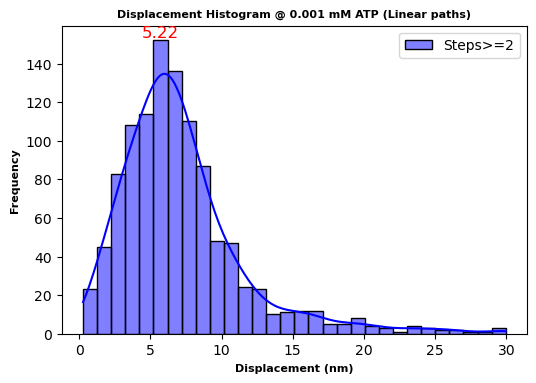

Total data points: 909
The average displacement of all points: 7.000833767070148
The average displacement after filtering: 7.365623337899071


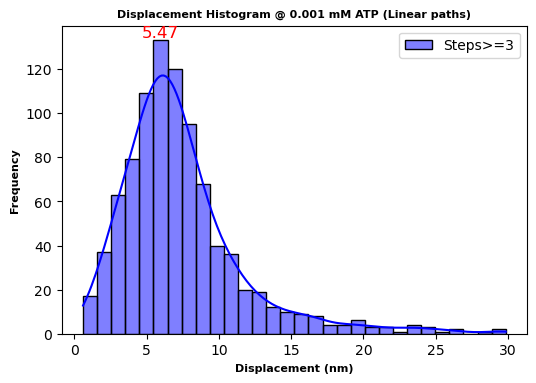

Total data points: 795
The average displacement of all points: 7.000833767070148
The average displacement after filtering: 7.325367623448106


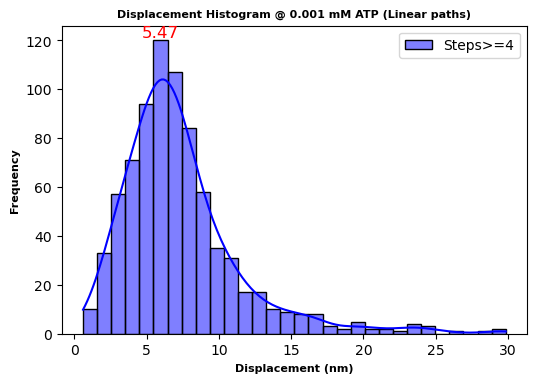

In [37]:
threshold_angle = 30
histogram(dataframe1, 2, '0.001', threshold_angle)
histogram(dataframe1, 3, '0.001', threshold_angle)
histogram(dataframe1, 4, '0.001', threshold_angle)

Total data points: 794
The average displacement of all points: 6.117818021258206
The average displacement after filtering: 6.90203313102503


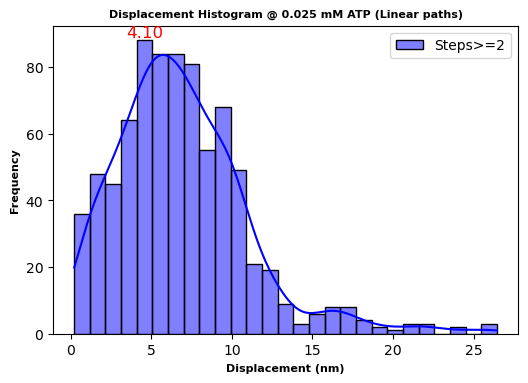

Total data points: 610
The average displacement of all points: 6.117818021258206
The average displacement after filtering: 7.155852516288575


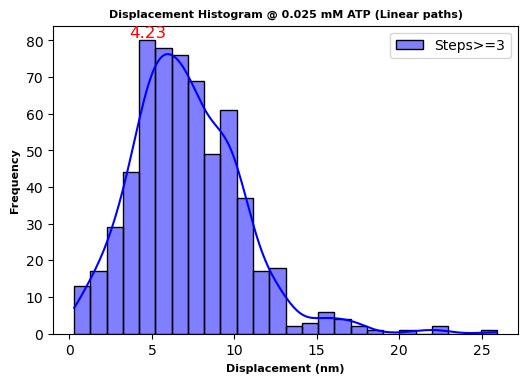

Total data points: 532
The average displacement of all points: 6.117818021258206
The average displacement after filtering: 7.3446308148820325


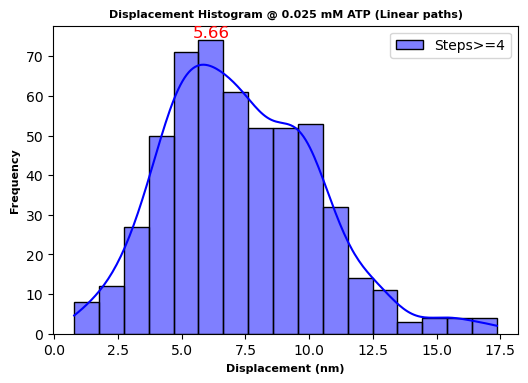

In [38]:
histogram(dataframe2, 2, '0.025', threshold_angle)
histogram(dataframe2, 3, '0.025', threshold_angle)
histogram(dataframe2, 4, '0.025', threshold_angle)

Total data points: 924
The average displacement of all points: 9.645934201775878
The average displacement after filtering: 11.679649116503798


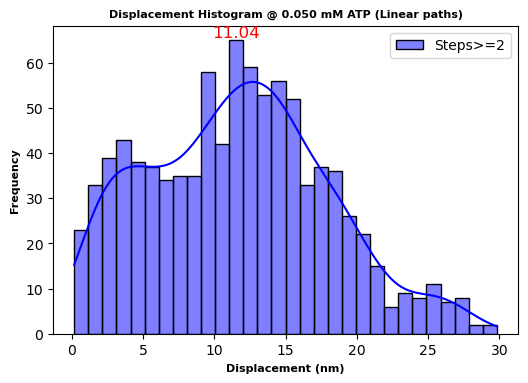

Total data points: 740
The average displacement of all points: 9.645934201775878
The average displacement after filtering: 12.629197048049289


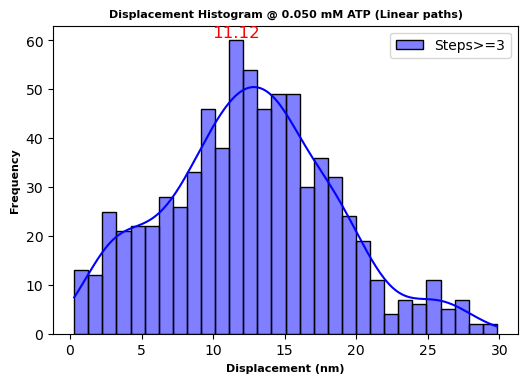

Total data points: 665
The average displacement of all points: 9.645934201775878
The average displacement after filtering: 12.896171281147526


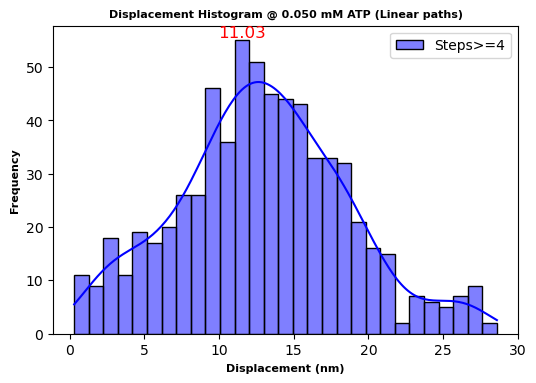

In [39]:
histogram(dataframe3, 2, '0.050', threshold_angle)
histogram(dataframe3, 3, '0.050', threshold_angle)
histogram(dataframe3, 4, '0.050', threshold_angle)

Total data points: 799
The average displacement of all points: 23.262380040420634
The average displacement after filtering: 23.902936758406266


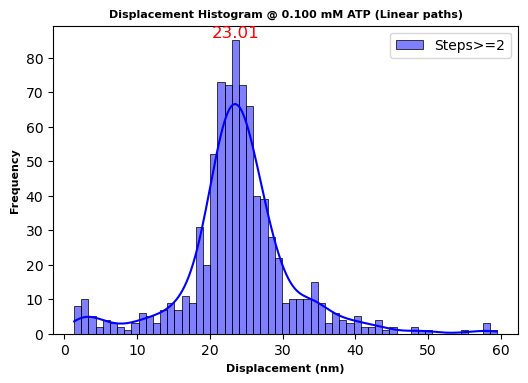

Total data points: 582
The average displacement of all points: 23.262380040420634
The average displacement after filtering: 24.060738644520967


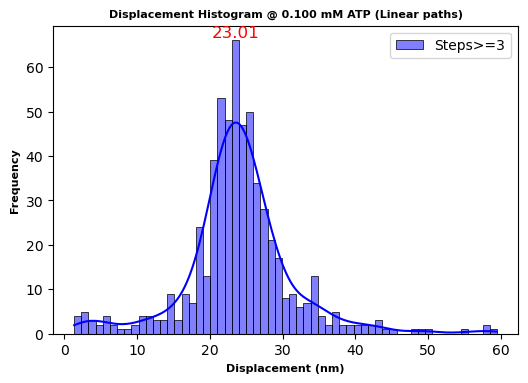

Total data points: 248
The average displacement of all points: 23.262380040420634
The average displacement after filtering: 23.29974053629682


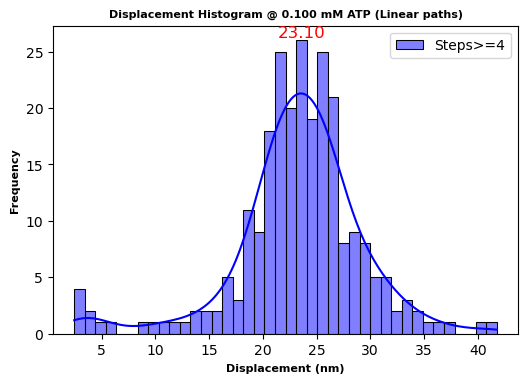

In [41]:
histogram(dataframe4, 2, '0.100', threshold_angle)
histogram(dataframe4, 3, '0.100', threshold_angle)
histogram(dataframe4, 4, '0.100', threshold_angle)

Total data points: 849
The average displacement of all points: 20.650558766032113
The average displacement after filtering: 27.49771969349967


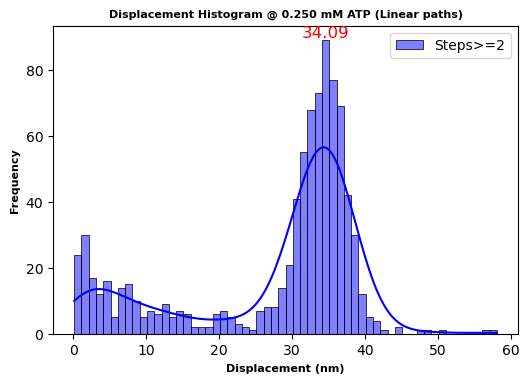

Total data points: 734
The average displacement of all points: 20.650558766032113
The average displacement after filtering: 30.55276639239382


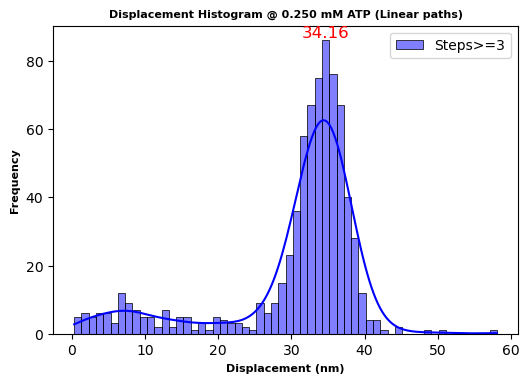

Total data points: 520
The average displacement of all points: 20.650558766032113
The average displacement after filtering: 32.68934872825025


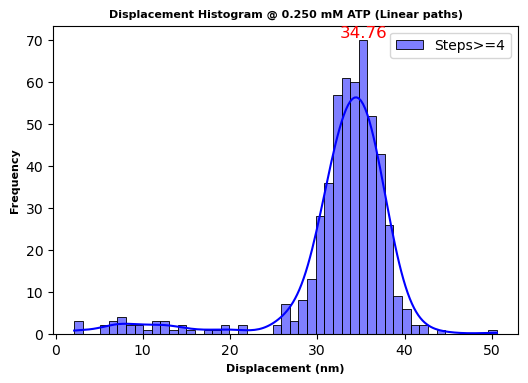

In [43]:
histogram(dataframe5, 2, '0.250', threshold_angle)
histogram(dataframe5, 3, '0.250', threshold_angle)
histogram(dataframe5, 4, '0.250', threshold_angle)

Total data points: 812
The average displacement of all points: 29.602518830893736
The average displacement after filtering: 36.76177668747901


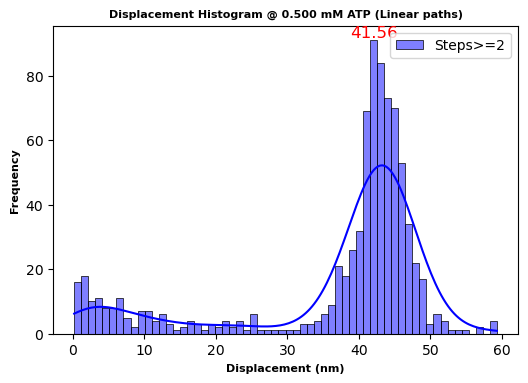

Total data points: 748
The average displacement of all points: 29.602518830893736
The average displacement after filtering: 39.323596287987634


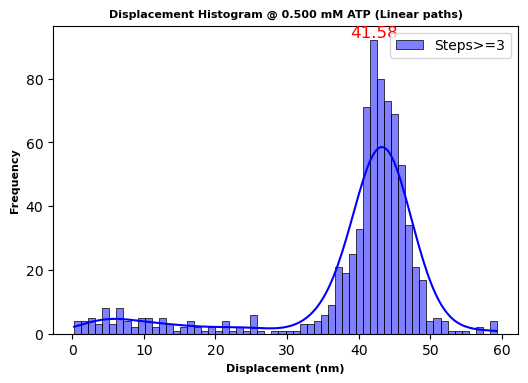

Total data points: 709
The average displacement of all points: 29.602518830893736
The average displacement after filtering: 40.388251313965405


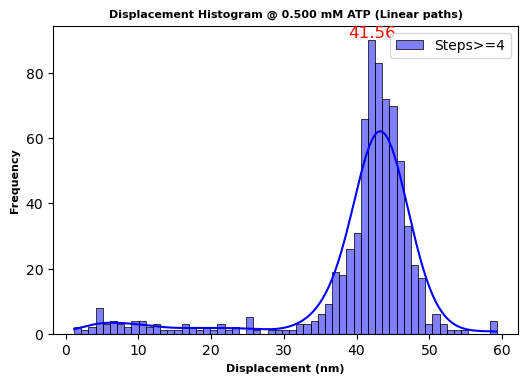

In [44]:
histogram(dataframe6, 2, '0.500', threshold_angle)
histogram(dataframe6, 3, '0.500', threshold_angle)
histogram(dataframe6, 4, '0.500', threshold_angle)

Total data points: 625
The average displacement of all points: 31.542093118833062
The average displacement after filtering: 42.17728357049658


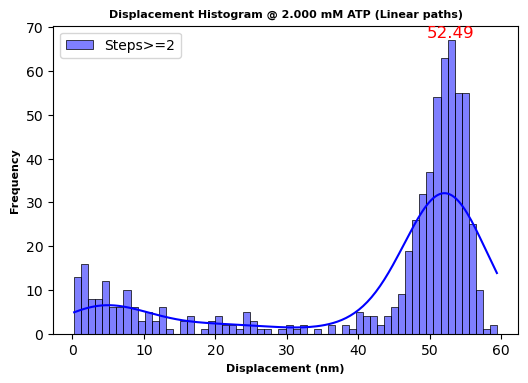

Total data points: 561
The average displacement of all points: 31.542093118833062
The average displacement after filtering: 46.13684715754945


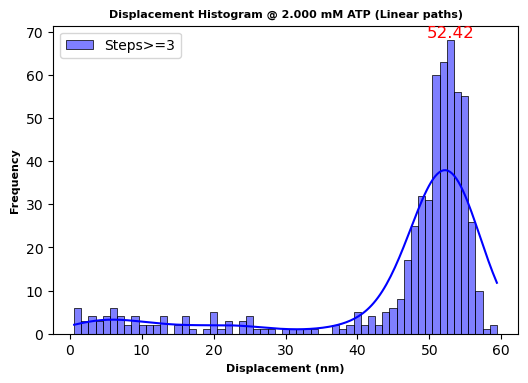

Total data points: 525
The average displacement of all points: 31.542093118833062
The average displacement after filtering: 48.007232909848234


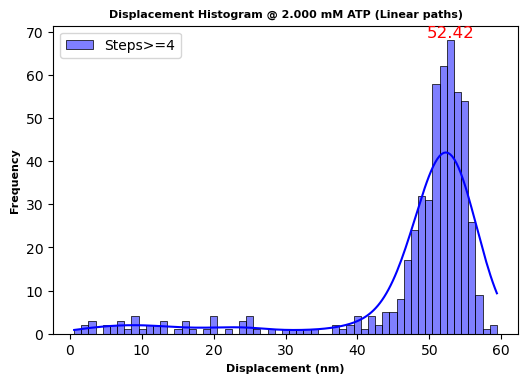

In [46]:
histogram(dataframe7, 2, '2.000', threshold_angle)
histogram(dataframe7, 3, '2.000', threshold_angle)
histogram(dataframe7, 4, '2.000', threshold_angle)

In [35]:
sum(dataframe4['displacement(nm)']>100)

0

# Combining all data for all the concentrations of ATP


Done: 0.001 mM ATP Steps >= 2
Done: 0.001 mM ATP Steps >= 3
Done: 0.001 mM ATP Steps >= 4
Done: 0.025 mM ATP Steps >= 2
Done: 0.025 mM ATP Steps >= 3
Done: 0.025 mM ATP Steps >= 4
Done: 0.050 mM ATP Steps >= 2
Done: 0.050 mM ATP Steps >= 3
Done: 0.050 mM ATP Steps >= 4
Done: 0.100 mM ATP Steps >= 2
Done: 0.100 mM ATP Steps >= 3
Done: 0.100 mM ATP Steps >= 4
Done: 0.250 mM ATP Steps >= 2
Done: 0.250 mM ATP Steps >= 3
Done: 0.250 mM ATP Steps >= 4
Done: 0.500 mM ATP Steps >= 2
Done: 0.500 mM ATP Steps >= 3
Done: 0.500 mM ATP Steps >= 4
Done: 2.000 mM ATP Steps >= 2
Done: 2.000 mM ATP Steps >= 3
Done: 2.000 mM ATP Steps >= 4


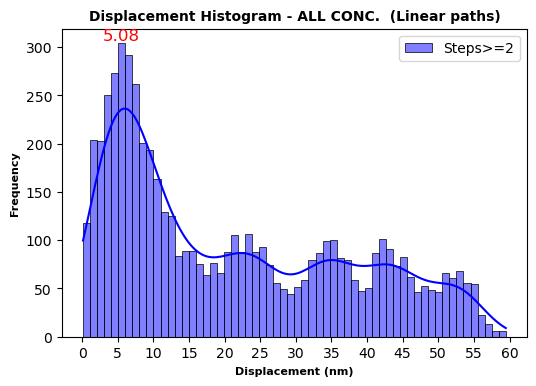

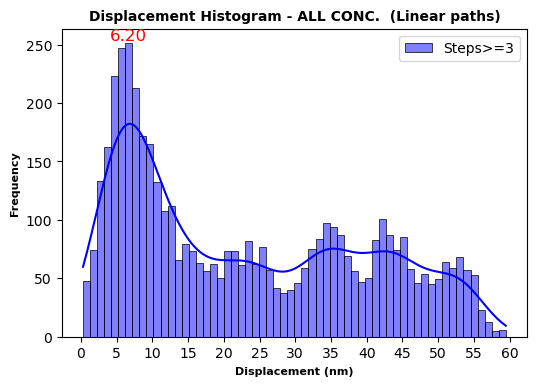

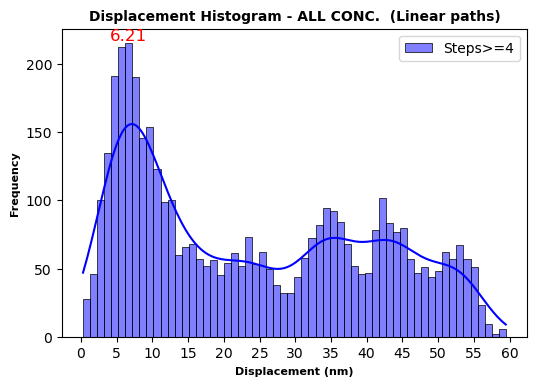

In [36]:
keys = linear_df.keys()
stepwise_df = {'Step>=2':[], 'Step>=3':[], 'Step>=4':[], }
done_keys = set()

while len(done_keys)!=len(keys):
    for k in keys:
        
        if k not in done_keys:
            if k[-1]=='2':
                done_keys.add(k)
                stepwise_df['Step>=2'].extend(linear_df[k])
                print('Done:', k)
            if k[-1]=='3':
                done_keys.add(k)
                stepwise_df['Step>=3'].extend(linear_df[k])
                print('Done:', k)
            if k[-1]=='4':
                done_keys.add(k)
                stepwise_df['Step>=4'].extend(linear_df[k])
                print('Done:', k)

                
linear_df2 = pd.DataFrame(stepwise_df['Step>=2'])
linear_df3 = pd.DataFrame(stepwise_df['Step>=3'])
linear_df4 = pd.DataFrame(stepwise_df['Step>=4'])

limit_of_displacement = 60
linear_df2 = linear_df2[linear_df2[0]<=limit_of_displacement]
linear_df3 = linear_df3[linear_df3[0]<=limit_of_displacement]
linear_df4 = linear_df4[linear_df4[0]<=limit_of_displacement]

bin_size = 1
steps_size = 2
step_size_min = 2 ## using for saving graph to get the number of min steps in the filename of the graph
for df in [linear_df2, linear_df3, linear_df4]:
    # Calculate the number of bins based on the data range and bin size
    min_value = min(df[0])
    max_value = max(df[0])
    num_bins = int((max_value - min_value) / bin_size) + 1
    ###

    plt.figure(figsize=(6, 4))

    # Plot the histogram
    sns.histplot(df[0], bins=num_bins, kde=True, color='blue', label='Steps>='+str(steps_size))
    # Set the custom x-ticks
    custom_x_ticks = [i*5 for i in range(limit_of_displacement//5+1)]
    plt.xticks(custom_x_ticks)
    # Find bins with high frequencies
    hist_data, bin_edges = np.histogram(df[0], bins=num_bins)
    threshold = np.max(hist_data) * 1 # Adjusted threshold

    # Find the bin with the highest frequency
    max_bin_index = np.argmax(hist_data)
    max_bin_x = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2
    max_bin_freq = hist_data[max_bin_index]

    # Mark the bin with the highest frequency
    # plt.axvline(x=max_bin_x, color='red', linestyle='--', label=f'Max Frequency ({max_bin_x:.2f}, {max_bin_freq})', linewidth=2)

    # Mark bins with high frequencies and place labels on the bars
    for i, freq in enumerate(hist_data):
        if freq >= threshold:
            x_pos = (bin_edges[i] + bin_edges[i + 1]) / 2
            plt.annotate(f'{bin_edges[i]:.2f}', (x_pos, freq), ha='center', va='bottom', fontsize=12, color='red')
    steps_size += 1
    plt.xlabel('Displacement (nm)', fontdict={'weight': 'bold', 'size': 8})
    plt.ylabel('Frequency', fontdict={'weight': 'bold', 'size': 8})
    plt.title('Displacement Histogram - ALL CONC.  (Linear paths)', fontdict={'color': 'black', 'weight': 'bold', 'size': 10})
    plt.legend()
    plt.savefig('AllCombined_minSteps_{}.svg'.format(step_size_min))
    step_size_min+=1
    plt.show()


<Axes: ylabel='Count'>

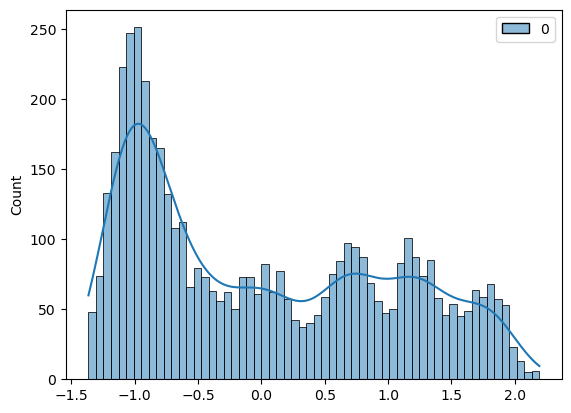

In [69]:

## scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(linear_df3)
# Calculate the number of bins based on the data range and bin size
min_value = min(scaled_df[0])
max_value = max(scaled_df[0])
# num_bins = int((max_value - min_value) / bin_size) + 1
###
sns.histplot(scaled_df, bins=60, kde=True)

#### print(len(linear_df2),len(linear_df3),len(linear_df4)) 15 Degree #- 4750, 3617, 2999 30 Degree #- 5892, 4887, 4390

In [37]:
print(len(linear_df2),len(linear_df3),len(linear_df4))

5892 4887 4390


### Saving the df for step sizes for every concentration and for steps 2,3,4 and threshold of 15, 30

In [38]:
## saving the step sizes for every concentration and for steps 2,3,4 and threshold of 15, 30
threshold = 15
for k in keys:
    df = pd.DataFrame(linear_df[k])
    df.to_excel(str(threshold)+'deg-'+k+'.xlsx', index=False)
    print('done', k)

done 0.001 mM ATP Steps >= 2
done 0.001 mM ATP Steps >= 3
done 0.001 mM ATP Steps >= 4
done 0.025 mM ATP Steps >= 2
done 0.025 mM ATP Steps >= 3
done 0.025 mM ATP Steps >= 4
done 0.050 mM ATP Steps >= 2
done 0.050 mM ATP Steps >= 3
done 0.050 mM ATP Steps >= 4
done 0.100 mM ATP Steps >= 2
done 0.100 mM ATP Steps >= 3
done 0.100 mM ATP Steps >= 4
done 0.250 mM ATP Steps >= 2
done 0.250 mM ATP Steps >= 3
done 0.250 mM ATP Steps >= 4
done 0.500 mM ATP Steps >= 2
done 0.500 mM ATP Steps >= 3
done 0.500 mM ATP Steps >= 4
done 2.000 mM ATP Steps >= 2
done 2.000 mM ATP Steps >= 3
done 2.000 mM ATP Steps >= 4


## Saving the pooled data - Step sizes for steps >=2, 3, 4

In [40]:
for df, name in [(linear_df2, '15degAllData_steps>=2'), \
                 (linear_df3, '15degAllData_steps>=3'), \
                 (linear_df4, '15degAllData_steps>=4')]:
    df.to_excel(name+'.xlsx', index=False)
    

# Analysing the steps relation(for min step 4)
### Taking 4 displacements only leaving the other

In [41]:

concentraions = linear_segments_minStep4.keys()

## lets combine all unit steps in a df

displacement_fun = lambda x1, y1, x2, y2 : 6*((x2-x1)**2 + (y2-y1)**2)**0.5 ## the displacement formula

df_unitSteps = {'d1':[], 'd2':[], 'd3':[], 'd4':[]} ## this contains the 1st, 2nd, 3rd, 4th step displacements of all linear path
                                                    ## for the case of minimum steps>=4; i have taken only the first 5 points there could be more points then 5 in the linear path

for conc in concentraions:
#     if conc != '0.100':
        for linear_points in linear_segments_minStep4[conc]:
            i = 1        

            for j in range(1, 5):
                x1, y1, _, _ = linear_points[j-1]
                x2, y2, _, _ = linear_points[j]
                d = displacement_fun(x1, y1, x2, y2)
                
                key = 'd'+str(i)
                
                df_unitSteps[key].append(d)

                i += 1
         
        
df_all_unit = pd.DataFrame(df_unitSteps) 
######## take into account only 60 nm step size ##########
df_all_unit = df_all_unit[(df_all_unit['d1'] < 60) & (df_all_unit['d2'] < 60) &(df_all_unit['d3'] < 60) &(df_all_unit['d4'] < 60)]
df_all_unit    

d1         d2         d3         d4
0     5.315744   8.926572  10.779760   7.762567
1     7.052042   5.510979   5.921794   4.635277
2     2.218035   2.451920   3.899395  11.998781
3     4.014244   5.189075   3.354837   1.636970
4     6.878097  12.526205   4.612231  16.285433
..         ...        ...        ...        ...
478  36.550773  53.284378  52.989046  49.165814
479  55.098425  53.049515  50.149895  47.837831
480  48.302684  49.532235  43.037821  52.893995
481  50.772453  55.288873  50.971452  52.286447
482  54.578535  46.998153  52.163688  51.340149

[478 rows x 4 columns]

In [42]:
df_all_unit.to_excel('pooled_data_d1d2d3d4_30degree_minStep4.xlsx', index=False)

### df_all_unit ## 15 degees shape -> 420 rows × 4 columns
### df_all_unit ## 30 degees shape -> 478 rows × 4 columns

In [43]:
threshold_angle = 30 # degrees

## Pooled Data Visualisation for d1, d2, d3, d4 for steps>=4 for above threshold angle

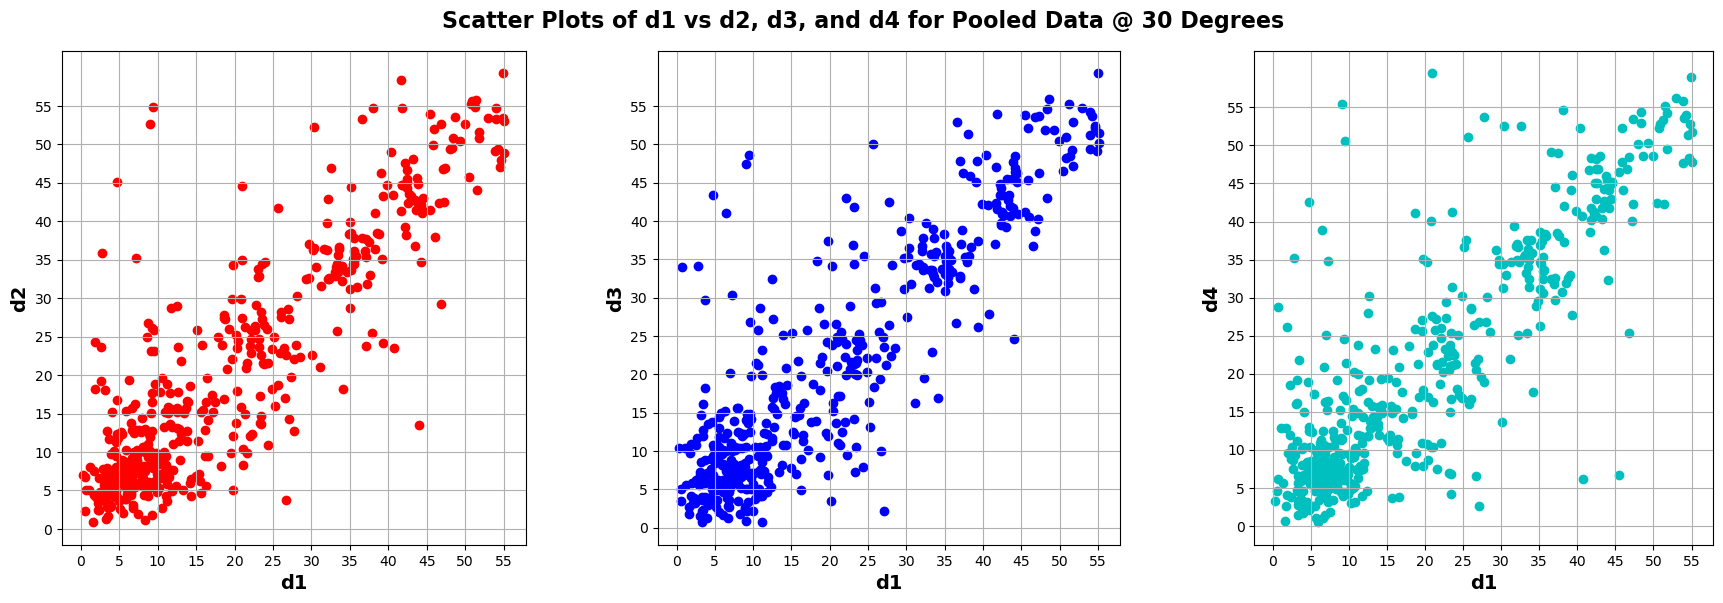

In [44]:
colors = ['r', 'b', 'c']
i=0
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure with 3 subplots in 1 row

for di, ax in zip(df_all_unit.keys()[1:], axs):
        ax.scatter(df_all_unit['d1'], df_all_unit[di], c=colors[i])
        ax.set_xlabel('d1', fontdict={'weight': 'bold', 'size': 14})
        ax.set_ylabel('{}'.format(di), fontdict={'weight': 'bold', 'size': 14})
        ax.set_aspect('equal', adjustable='box')
        custom_ticks = [i * 5 for i in range(12)]
        ax.set_xticks(custom_ticks)
        ax.set_yticks(custom_ticks)
        ax.grid(True)
        i += 1
fig.suptitle('Scatter Plots of d1 vs d2, d3, and d4 for Pooled Data @ {} Degrees'.format(threshold_angle), fontsize=16, fontweight='bold')  # Set the main title for the figure

# plt.tight_layout()  # Adjust the spacing between subplots
name = 'Scatter Plots of d1 vs d2, d3, and d4 for Pooled Data {} Degrees.svg'.format(threshold_angle)
plt.savefig(name)
plt.tight_layout()

plt.show()


In [86]:
pip install --upgrade scikit-learn numpy scipy threadpoolctl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 5.0 MB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 36.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 23.4 MB/s eta 0:00:0000:0100:01
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's 

In [87]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3)

d = df_all_unit[['d1', 'd2']]

# Fit the GMM model for the dataset 
# which expresses the dataset as a 
# mixture of 3 Gaussian Distribution
gmm.fit(d)
 
# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 
# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [82]:
d

d1         d2
0     5.315744   8.926572
1     7.052042   5.510979
2     2.218035   2.451920
3     4.014244   5.189075
4     6.878097  12.526205
..         ...        ...
478  36.550773  53.284378
479  55.098425  53.049515
480  48.302684  49.532235
481  50.772453  55.288873
482  54.578535  46.998153

[478 rows x 2 columns]

## Individual Conc Data visualisation for d1, d2, d3, d4 for steps>=4

In [45]:
concentraions = linear_segments_minStep4.keys()

## lets combine all unit steps in a df
def get_d1d2d3d4_plot_for_a_conc(conc):
    displacement_fun = lambda x1, y1, x2, y2 : 6*((x2-x1)**2 + (y2-y1)**2)**0.5 ## the displacement formula

    df_unitSteps = {'d1':[], 'd2':[], 'd3':[], 'd4':[]} ## this contains the 1st, 2nd, 3rd, 4th step displacements of all linear path
                                                        ## for the case of minimum steps>=4; i have taken only the first 5 points there could be more points then 5 in the linear path    
    for linear_points in linear_segments_minStep4[conc]:
        i = 1        

        for j in range(1, 5):
            x1, y1, _, _ = linear_points[j-1]
            x2, y2, _, _ = linear_points[j]
            d = displacement_fun(x1, y1, x2, y2)

            key = 'd'+str(i)

            df_unitSteps[key].append(d)

            i += 1

    df_all_unit = pd.DataFrame(df_unitSteps) 
    
    ####### take into account only 60 nm step size ##########
    df_all_unit = df_all_unit[(df_all_unit['d1'] < 60) & (df_all_unit['d2'] < 60) &(df_all_unit['d3'] < 60) &(df_all_unit['d4'] < 60)]
    # above contains the d1, d2, d3, d4 for the concentraition conc
    
    ################################ plotting the d1 / d2 / d3 / d4 ##########################################
    colors = ['r', 'b', 'c']
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure with 3 subplots in 1 row

    i = 0
    d1d2d3d4 = df_all_unit
    
    for di, ax in zip(d1d2d3d4.keys()[1:], axs):
        ax.scatter(d1d2d3d4['d1'], d1d2d3d4[di], c=colors[i])
        ax.set_xlabel('d1', fontdict={'weight': 'bold', 'size': 14})
        ax.set_ylabel('{}'.format(di), fontdict={'weight': 'bold', 'size': 14})
        ax.set_aspect('equal', adjustable='box')
        custom_ticks = [i * 5 for i in range(12)]
        ax.set_xticks(custom_ticks)
        ax.set_yticks(custom_ticks)
        ax.grid(True)
        i += 1
    fig.suptitle('Scatter Plots of d1 vs d2, d3, and d4 for {} {} degrees'.format(conc+'mM ATP', threshold_angle), fontsize=18, fontweight='bold')  # Set the main title for the figure
    
    
    name = 'Scatter Plots of d1 vs d2, d3, and d4 for {} {} degrees'.format(conc+'mM ATP', threshold_angle)
    plt.savefig(name+'.svg')
    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()

        

In [46]:
concentraions

dict_keys(['0.001', '0.025', '0.050', '0.100', '0.250', '0.500', '2.000'])

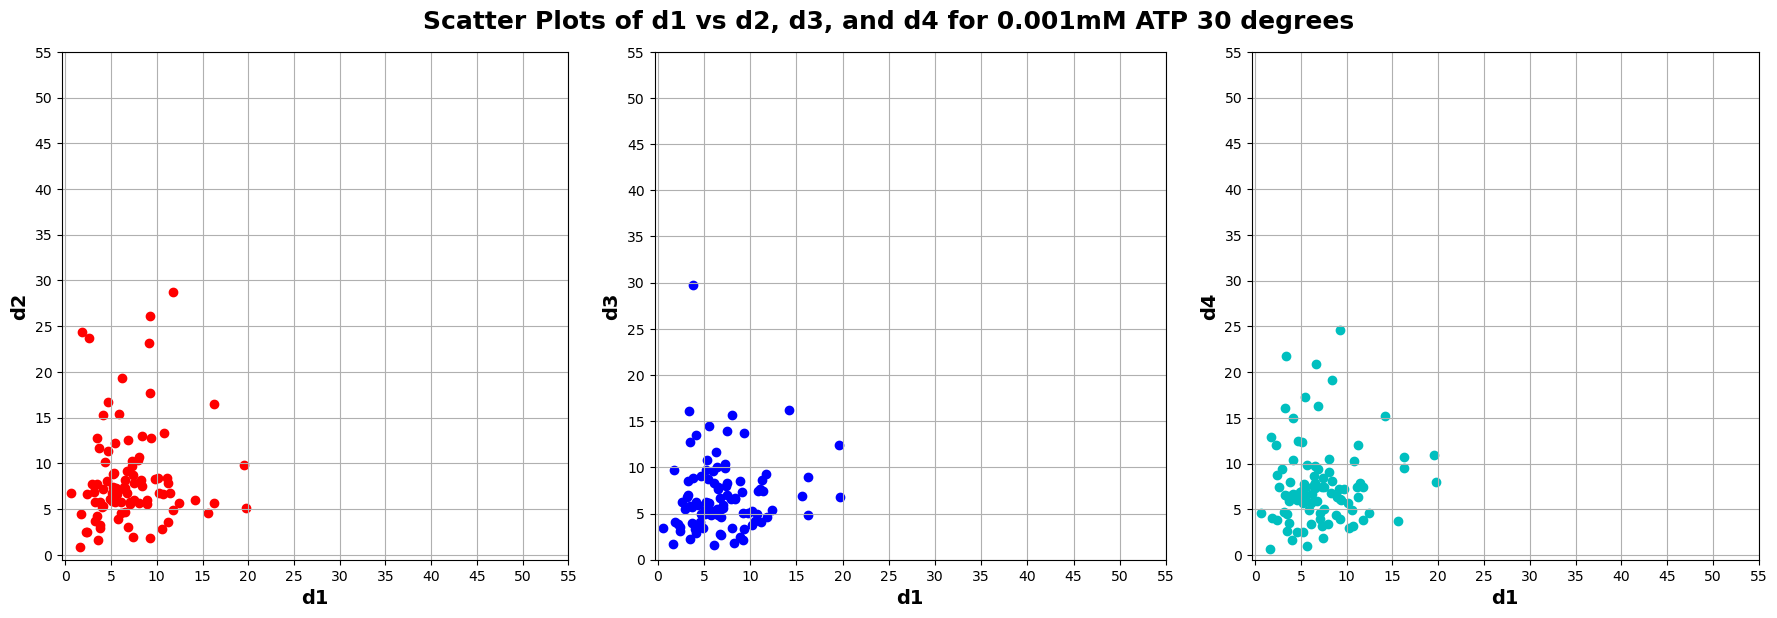

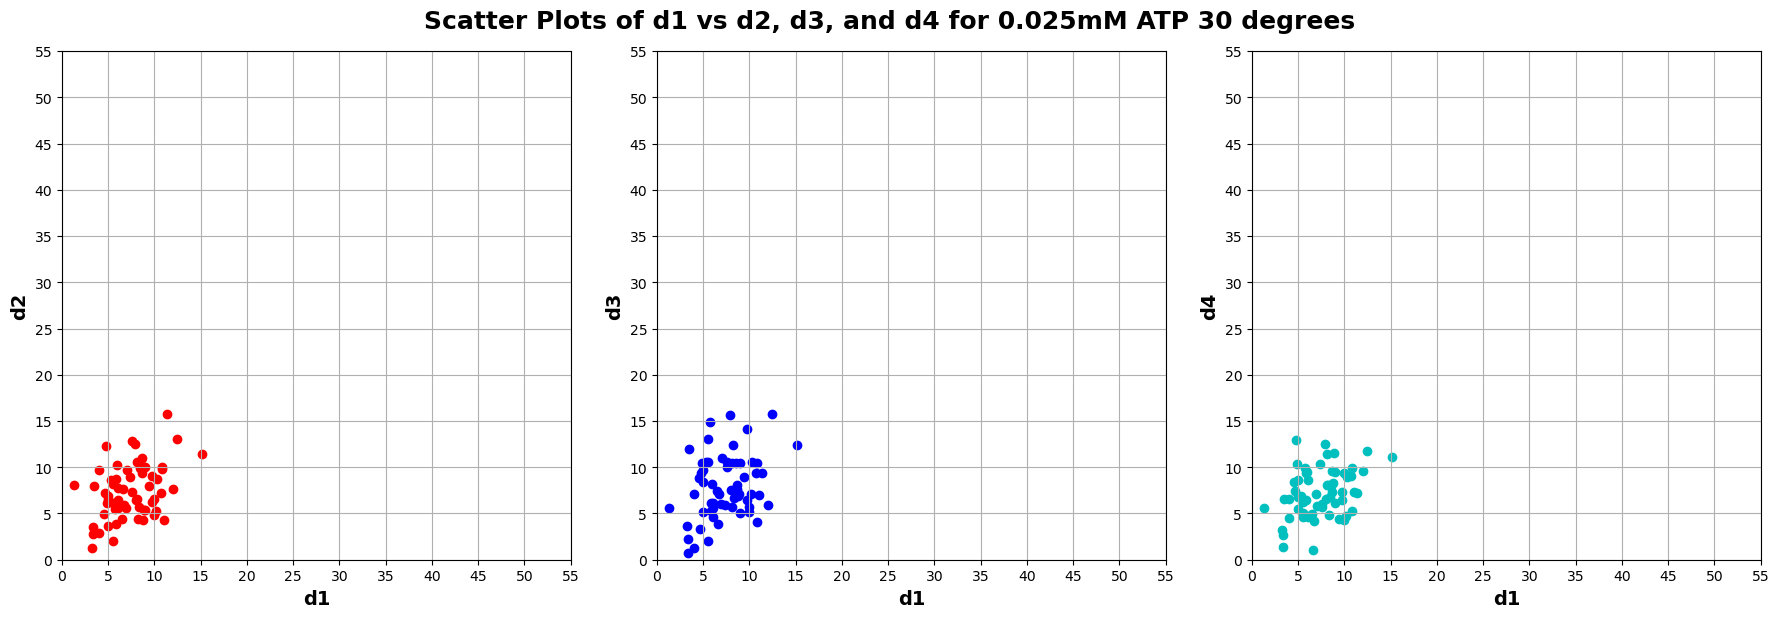

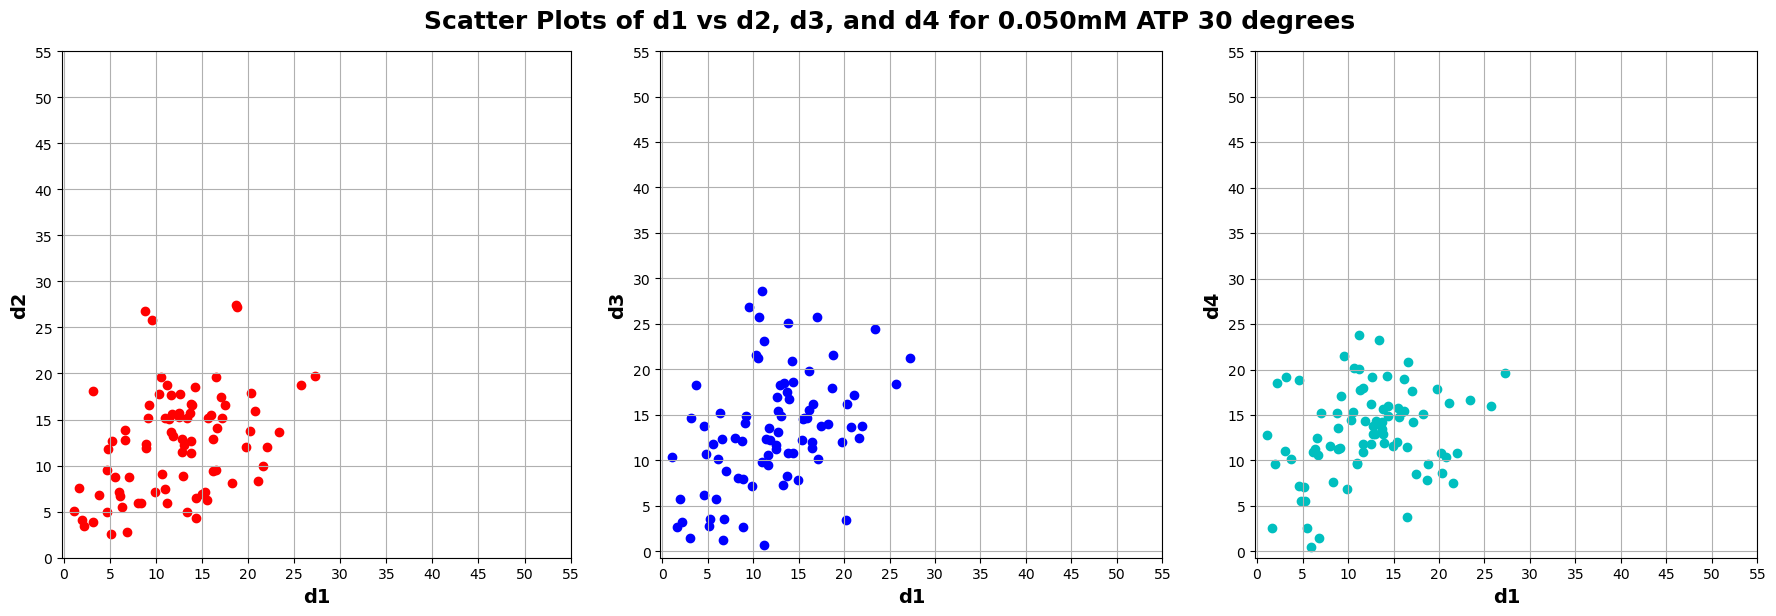

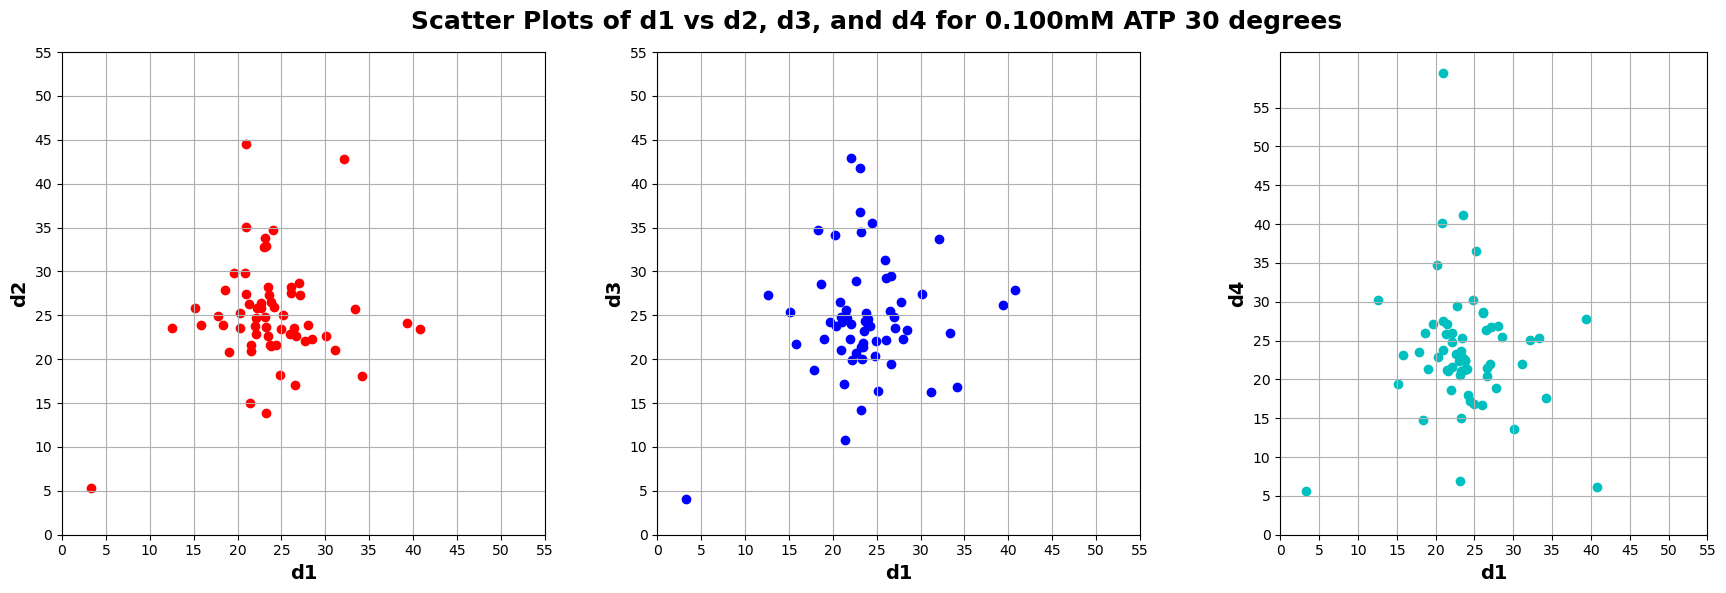

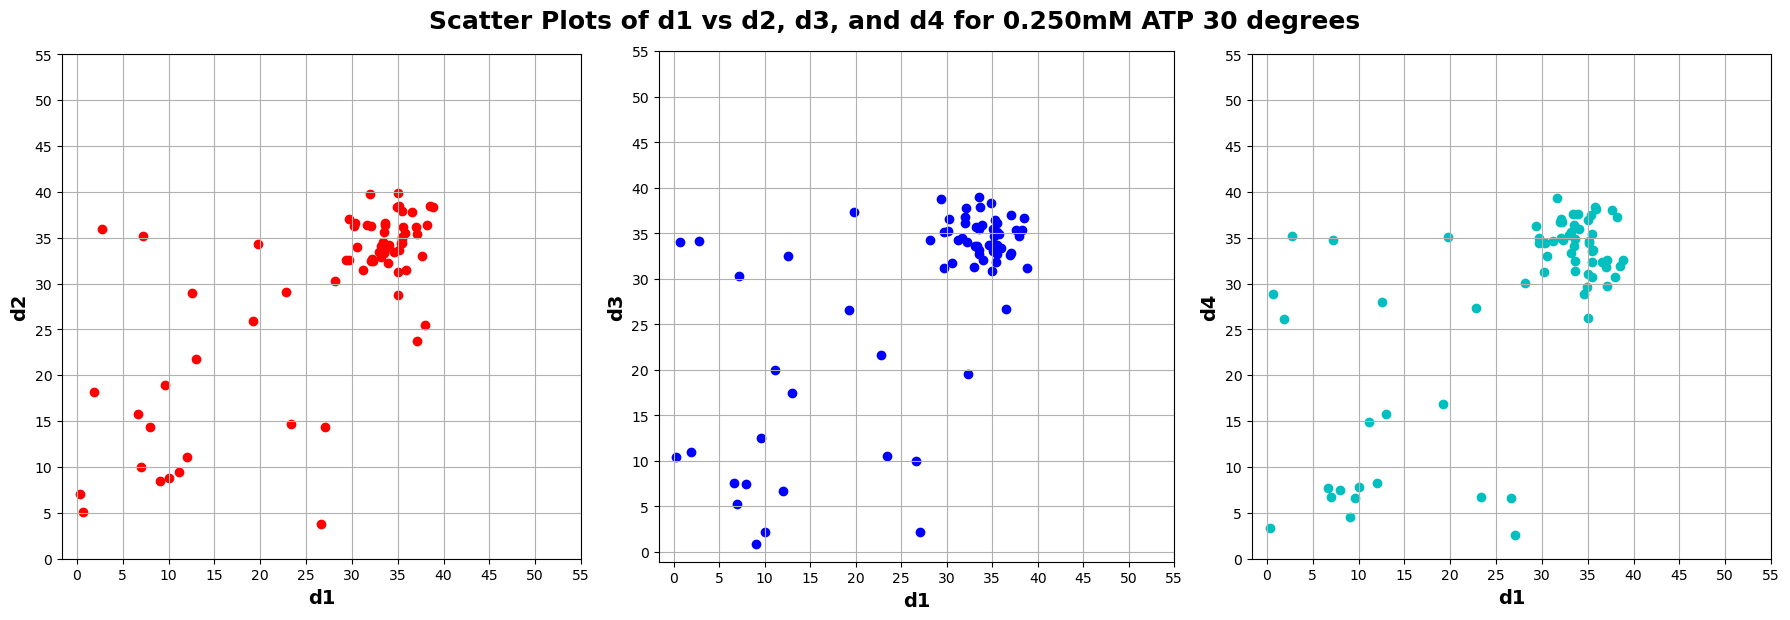

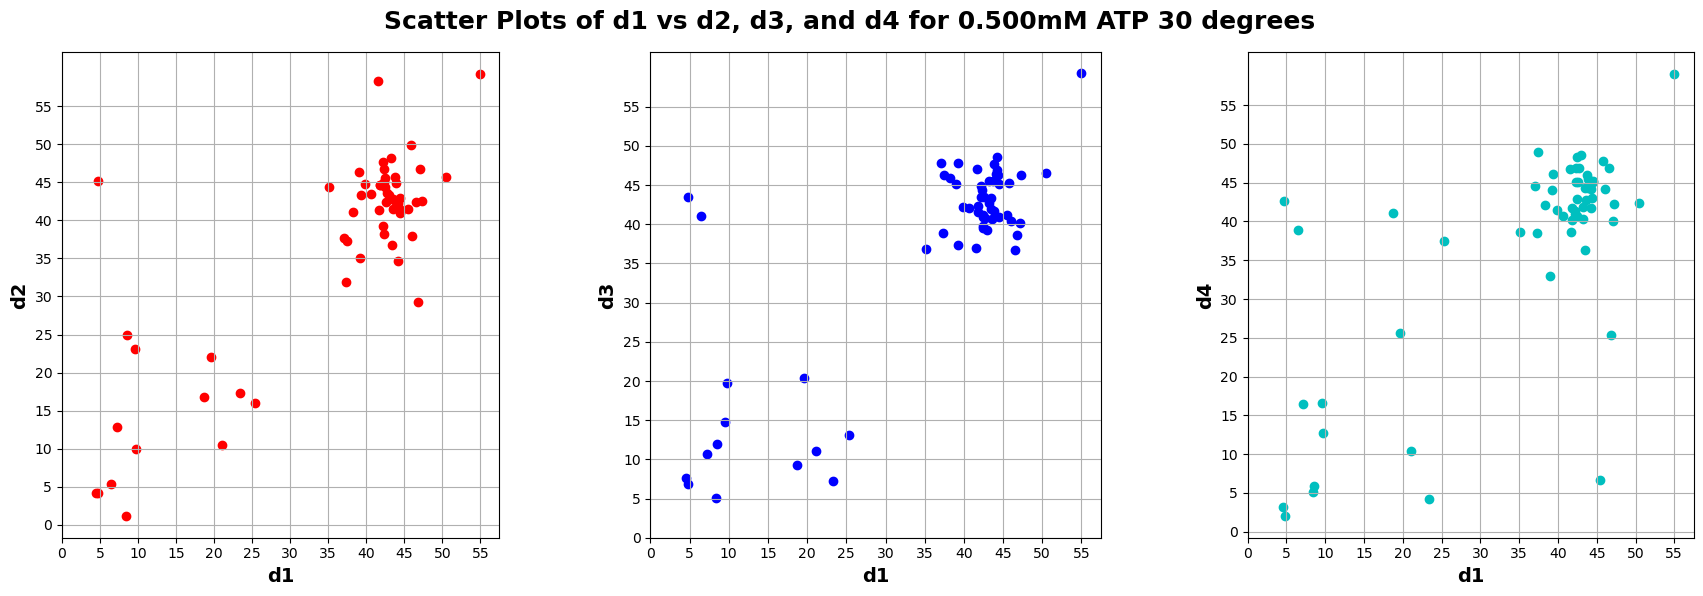

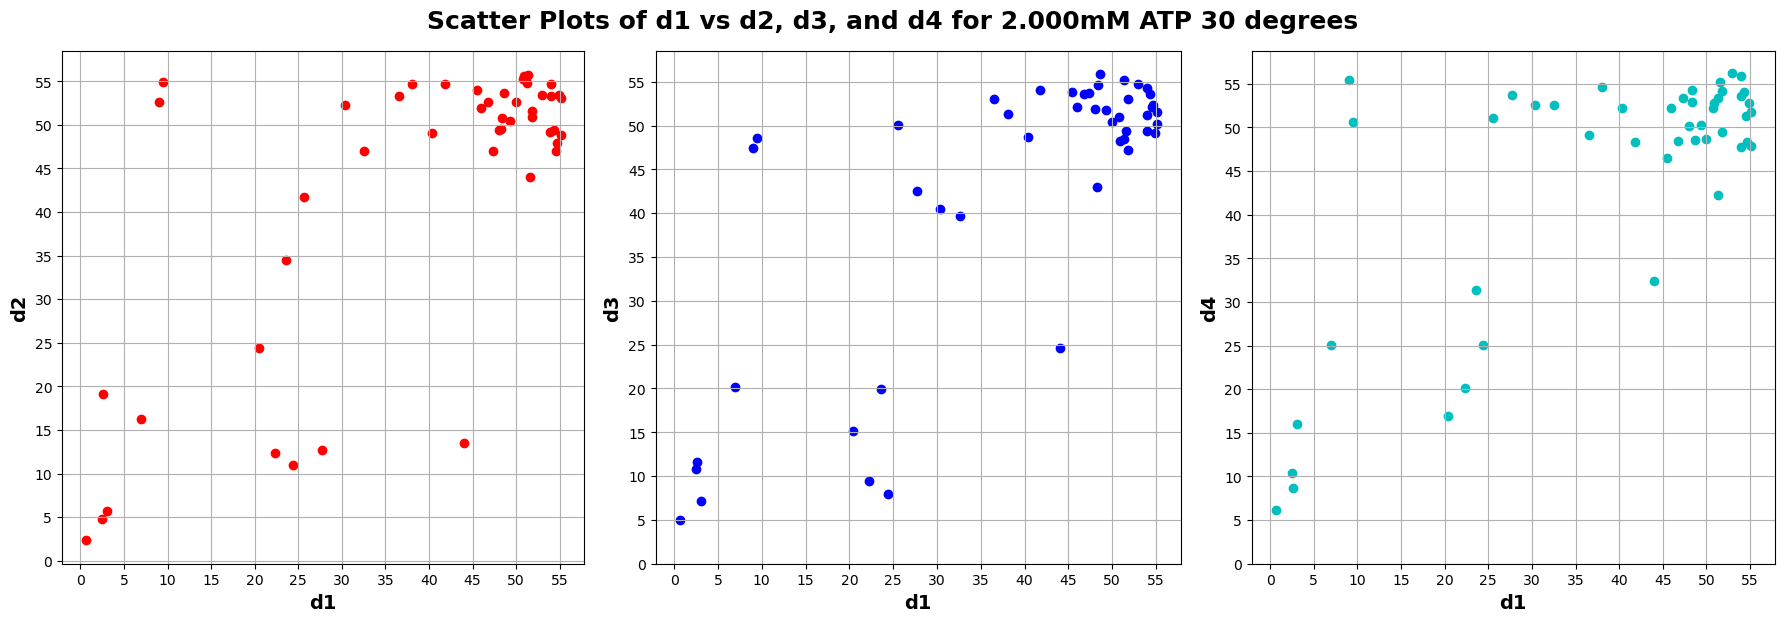

In [47]:
for conc in concentraions:
    get_d1d2d3d4_plot_for_a_conc(conc)

### inference - It is observed that the simultaneous steps(d1, d2, d3, d4) in a linear path are approximately equal
### as the line fit is y = x (-> di = dj)

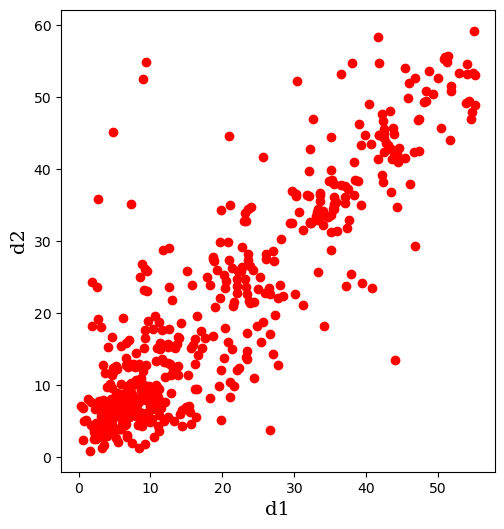

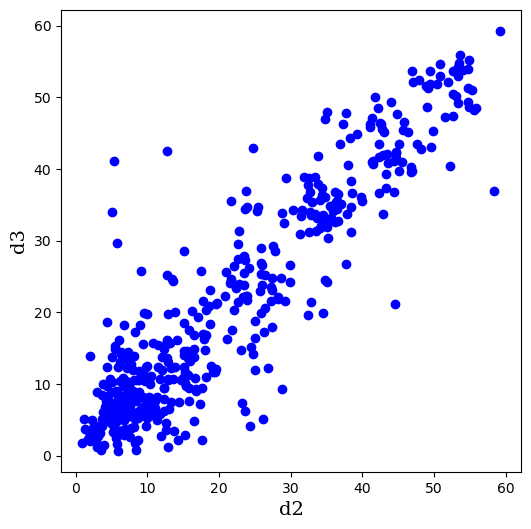

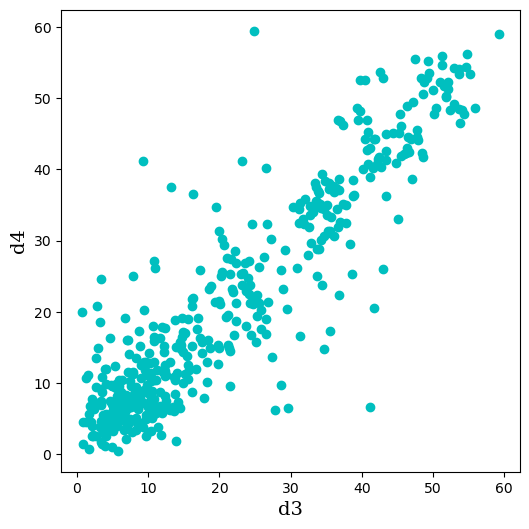

In [48]:
keys = df_all_unit.keys()
colors = ['r', 'b', 'c']
for i in range(1, len(keys)):
    plt.figure(figsize=(8, 6))
    plt.scatter(df_all_unit[keys[i-1]], df_all_unit[keys[i]], c=colors[i-1])
    plt.xlabel('{}'.format(keys[i-1]) , fontdict={'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 14})
    plt.ylabel('{}'.format(keys[i]), fontdict={'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 14})
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [49]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
## peak finder

# data is the linear displacements (here min steps 4 considered)
df = linear_df4
bin_size = 1
min_value = min(df[0])
max_value = max(df[0])
num_bins = int((max_value - min_value) / bin_size) + 1

hist, bin_edges = np.histogram(df, bins=num_bins)
bin_centers = []
for i in range(len(bin_edges)-1):
    bin_centers.append((bin_edges[i]+bin_edges[i+1])/2)
    
# Find peaks in the histogram
peaks, _ = find_peaks(hist)

# Extract the positions of the peaks
peak_positions = []
for i in range(len(peaks)):
    peak_positions.append(bin_centers[peaks[i]])

count_peaks = [hist[i] for i in peaks]
# Generate initial guesses using peak positions
## Amplitude (A), -- peak height of the Gaussian curve represents the maximum value of the curve
## Mean (μ), --represents the position of the peak's center in the histogram, 
## Standard Deviation (σ)



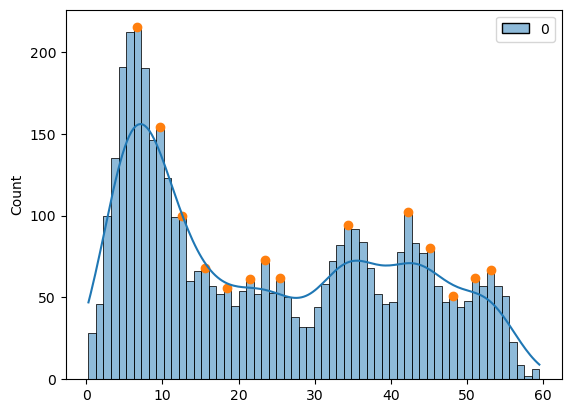

In [50]:
sns.histplot(df, bins=num_bins, kde=True)
plt.scatter(peak_positions, [hist[i] for i in peaks])

<Axes: ylabel='Density'>

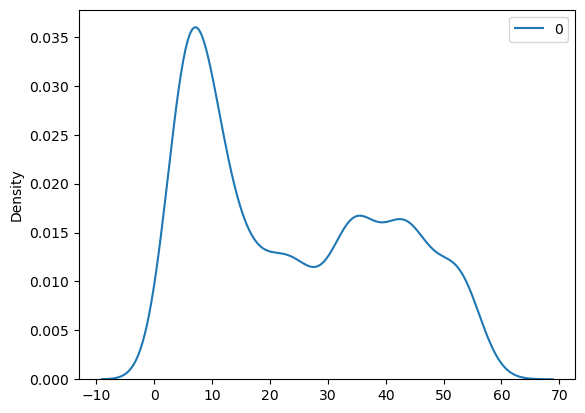

In [51]:
sns.kdeplot(data=df)

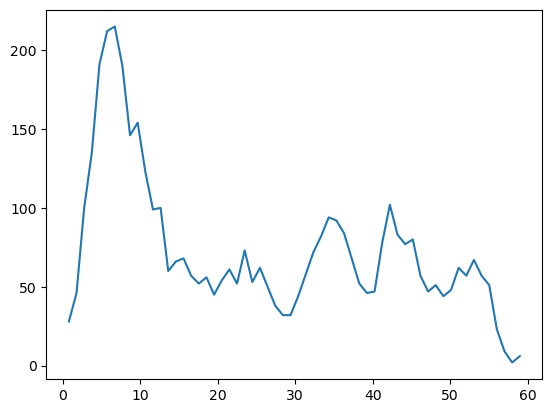

In [52]:
plt.plot(bin_centers, hist)

In [53]:
count_peaks

[215, 154, 100, 68, 56, 61, 73, 62, 94, 102, 80, 51, 62, 67]

In [54]:
peak_positions

[6.7068942095918835,
 9.665838968239743,
 12.624783726887602,
 15.58372848553546,
 18.54267324418332,
 21.501618002831176,
 23.47424784192975,
 25.446877681028322,
 34.3237119569719,
 42.214231313366184,
 45.173176072014044,
 48.132120830661904,
 51.091065589309764,
 53.06369542840834]

In [55]:
initial_guesses

NameError: name 'initial_guesses' is not defined

In [ ]:
## for threshold = 15 degrees
# initial_guesses = [(hist[peaks[0]], peak_positions[0], 1),\
#                    (hist[peaks[9]], peak_positions[9], 0.01),\
#                    (hist[peaks[11]], peak_positions[11], 0.12),\
#                    (hist[peaks[14]], peak_positions[14], 0.11)]
## for threshold = 30 degrees
initial_guesses = [(hist[peaks[0]], peak_positions[0], 1),\
                   (hist[peaks[8]], peak_positions[8], 1)]

# data is the linear displacements (here min steps 4 considered)

def gaussian(x, A, mean, sigma):
    return A * np.exp(-(x - mean)**2 / (2 * sigma**2))

# You need to provide initial guesses for each Gaussian fit.
initial_guess = initial_guesses

popt_list = []
for guess in initial_guess:
    popt, _ = curve_fit(gaussian, bin_centers, hist, p0=guess)
    print(guess, popt)
    popt_list.append(popt)

    

In [ ]:
popt_list

In [ ]:
# Iterate through the list of optimal parameters (popt_list) and plot each Gaussian
plt.figure(figsize=(8, 6))
sns.histplot(df, bins=num_bins)  # Plot the histogram

x = np.linspace(min(bin_centers), max(bin_centers), 1000)  # Generate x-values for smooth curves

for popt in popt_list:
    y = gaussian(x, *popt)  # Calculate the Gaussian curve using parameters
    plt.plot(x, y, color='red')  # Plot the Gaussian curve

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Histogram with fitted Gaussian curves')
plt.show()

In [ ]:
# Combine Gaussian functions based on optimized parameters
def combined_gaussian(x, *params):
    num_gaussians = len(params) // 3  # Number of Gaussian components
    result = np.zeros_like(x)
    for i in range(num_gaussians):
        A, mean, sigma = params[i * 3:(i + 1) * 3]
        result += gaussian(x, A, mean, sigma)
    return result

# Fit a combined Gaussian function
popt_combined, _ = curve_fit(combined_gaussian, bin_centers, hist, p0=np.concatenate(popt_list))

# Plot the histogram and the combined Gaussian curve
plt.figure(figsize=(8, 6))
sns.histplot(df, bins=num_bins)  # Plot the histogram

x = np.linspace(min(bin_centers), max(bin_centers), 1000)  # Generate x-values for smooth curve
y_combined = combined_gaussian(x, *popt_combined)  # Calculate the combined Gaussian curve

plt.plot(x, y_combined, color='red')  # Plot the combined Gaussian curve

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Histogram with Multiple Gaussian Fit')
plt.legend()
plt.show()







In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample data - replace this with your histogram data
data = np.random.normal(loc=0, scale=1, size=1000)
data = np.concatenate([data, np.random.normal(loc=5, scale=1, size=1000)])
data = np.concatenate([data, np.random.normal(loc=10, scale=1, size=1000)])

# Define a Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev) ** 2)

# Define a function to fit multiple peaks
def multi_gaussian(x, *params):
    num_peaks = len(params) // 3  # Each peak has three parameters: amplitude, mean, stddev
    result = np.zeros(len(x))  # Ensure the result array has the same size as x

    for i in range(num_peaks):
        result += gaussian(x, *params[i*3:i*3+3])

    return result

# Initial guesses for the parameters (amplitude, mean, stddev) for each peak
p0 = [1, 0, 1, 1, 5, 1, 1, 10, 1]  # For three peaks

# Bounds for the parameters (lower and upper bounds for each parameter)
bounds = ([0, -np.inf, 0, 0, 3, 0, 0, 8, 0], [np.inf, np.inf, np.inf, np.inf, 7, np.inf, np.inf, 12, np.inf])

# Fit the data with the multi-peak Gaussian function
x_values = np.linspace(-5, 15, 3000)  # Use more points to cover the range
popt, pcov = curve_fit(multi_gaussian, x_values, data, p0=p0, bounds=bounds)

# Plot the data and the fitted curve
plt.hist(data, bins=50, density=True, alpha=0.7, color='blue', label='Histogram')
plt.plot(x_values, multi_gaussian(x_values, *popt), color='red', label='Fitted Curve')
plt.legend()
plt.show()
